In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

/home/cronos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

1.14.0


/home/cronos/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cronos/.local/lib/python3.6/site-packages/tensorboard/compat/ten

In [2]:
import tensorflow_datasets as tfds

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
# read .csvfile from pandas
df = pd.read_csv('USA_Housing.csv')

In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


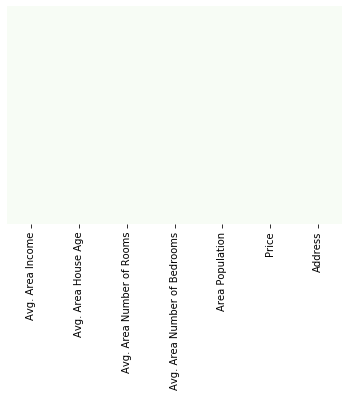

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar = False,cmap='Greens')

In [9]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# split the data

In [10]:
X = df.drop(['Price','Address'],axis=1) # X is for training and Y for testing 
Y = df['Price'] 

In [11]:
stats = X.describe()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

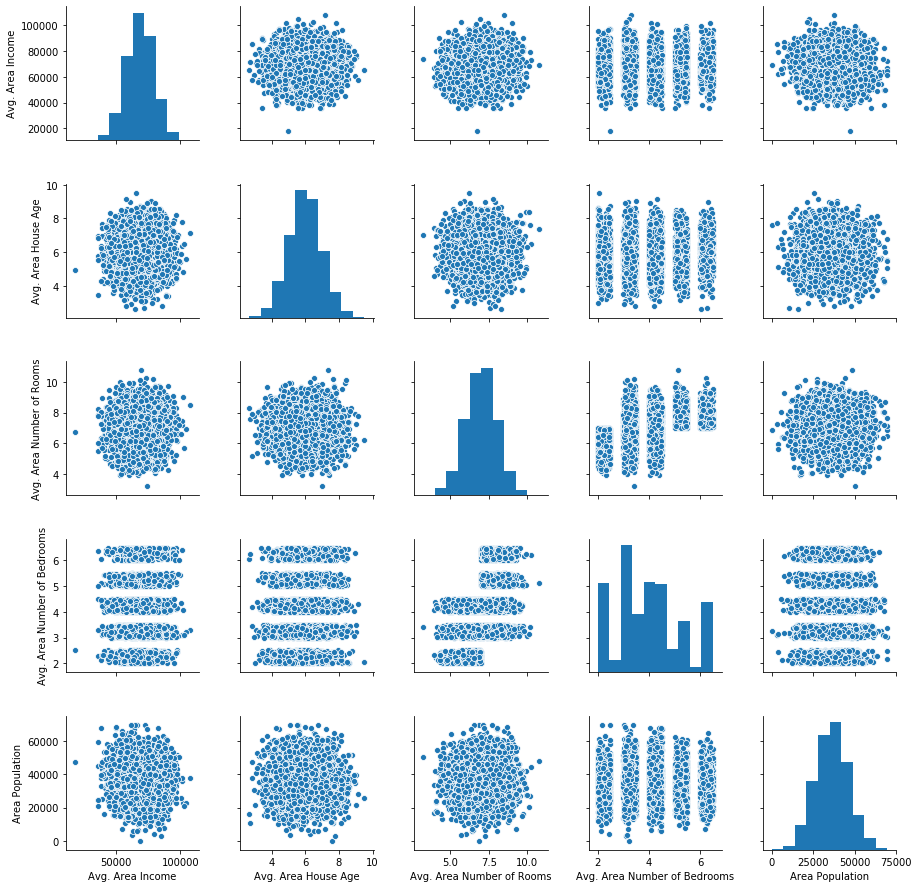

In [14]:
sns.pairplot(X)

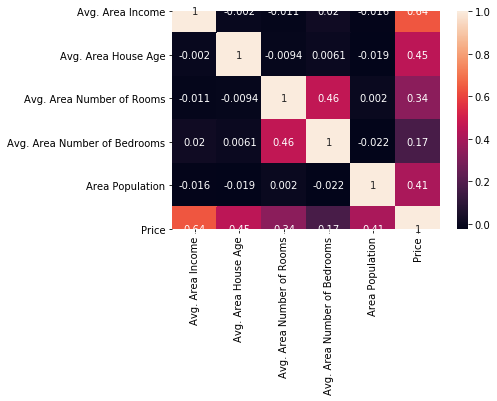

In [15]:
sns.heatmap(df.corr(), annot=True)

In [16]:
def norm(x):                                        # normalization of train datasets
    return (x-stats.mean()/stats.std())
norm_X_train = norm(X_train)
norm_X_test = norm(X_test)

In [17]:
len(norm_X_train.keys())

5

In [18]:
len(Y_train) 

3750

In [19]:
len(norm_X_train)     

3750

# Build the model

In [20]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(norm_X_train.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  model.compile(loss='mse',
                optimizer=adam,
                metrics=['mse','mae'])
  return model

In [21]:
model = build_model()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit(norm_X_train,Y_train,epochs=10000)

Epoch 1/10000
3750/3750 [==============================] - 0s 45us/sample - loss: 62448929856.9899 - mean_squared_error: 62448926720.0000 - mean_absolute_error: 200829.0781
Epoch 2/10000
3750/3750 [==============================] - 0s 40us/sample - loss: 62238031207.9019 - mean_squared_error: 62238035968.0000 - mean_absolute_error: 200123.4375
Epoch 3/10000
3750/3750 [==============================] - 0s 41us/sample - loss: 62229074321.9541 - mean_squared_error: 62229078016.0000 - mean_absolute_error: 200332.1875
Epoch 4/10000
3750/3750 [==============================] - 0s 41us/sample - loss: 62169422128.7424 - mean_squared_error: 62169415680.0000 - mean_absolute_error: 200374.7344
Epoch 5/10000
3750/3750 [==============================] - 0s 45us/sample - loss: 62167016640.7851 - mean_squared_error: 62167003136.0000 - mean_absolute_error: 200136.8125
Epoch 6/10000
3750/3750 [==============================] - 0s 43us/sample - loss: 62442447018.3936 - mean_squared_error: 62442450944.00

3750/3750 [==============================] - 0s 40us/sample - loss: 62139532762.5899 - mean_squared_error: 62139527168.0000 - mean_absolute_error: 200302.9688
Epoch 49/10000
3750/3750 [==============================] - 0s 45us/sample - loss: 62568554177.0581 - mean_squared_error: 62568554496.0000 - mean_absolute_error: 200469.0781
Epoch 50/10000
3750/3750 [==============================] - 0s 43us/sample - loss: 62498400897.1605 - mean_squared_error: 62498406400.0000 - mean_absolute_error: 200528.1250
Epoch 51/10000
3750/3750 [==============================] - 0s 36us/sample - loss: 62824354740.0875 - mean_squared_error: 62824341504.0000 - mean_absolute_error: 201119.7500
Epoch 52/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62138559631.6331 - mean_squared_error: 62138552320.0000 - mean_absolute_error: 199865.7812
Epoch 53/10000
3750/3750 [==============================] - 0s 38us/sample - loss: 62204996545.1947 - mean_squared_error: 62204985344.0000 - mean

3750/3750 [==============================] - 0s 30us/sample - loss: 62192606401.8773 - mean_squared_error: 62192611328.0000 - mean_absolute_error: 199668.4062
Epoch 96/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62303419631.7525 - mean_squared_error: 62303408128.0000 - mean_absolute_error: 200326.9688
Epoch 97/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61979227481.7024 - mean_squared_error: 61979226112.0000 - mean_absolute_error: 199752.9062
Epoch 98/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62326889849.3781 - mean_squared_error: 62326874112.0000 - mean_absolute_error: 200634.7656
Epoch 99/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62291580363.2981 - mean_squared_error: 62291574784.0000 - mean_absolute_error: 200026.0156
Epoch 100/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 62125346363.8016 - mean_squared_error: 62125334528.0000 - mea

3750/3750 [==============================] - 0s 35us/sample - loss: 62286037673.5744 - mean_squared_error: 62286041088.0000 - mean_absolute_error: 199930.4688
Epoch 142/10000
3750/3750 [==============================] - 0s 36us/sample - loss: 62122481121.1435 - mean_squared_error: 62122483712.0000 - mean_absolute_error: 199996.6875
Epoch 143/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62101040926.9931 - mean_squared_error: 62101045248.0000 - mean_absolute_error: 199669.6250
Epoch 144/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62154499862.2549 - mean_squared_error: 62154502144.0000 - mean_absolute_error: 199872.6094
Epoch 145/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62090196377.0539 - mean_squared_error: 62090194944.0000 - mean_absolute_error: 199978.3438
Epoch 146/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62610785986.1504 - mean_squared_error: 62610788352.0000 -

3750/3750 [==============================] - 0s 35us/sample - loss: 62296092471.2960 - mean_squared_error: 62296096768.0000 - mean_absolute_error: 199920.4844
Epoch 188/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 62214173828.7104 - mean_squared_error: 62214164480.0000 - mean_absolute_error: 200274.7500
Epoch 189/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 62050229037.7387 - mean_squared_error: 62050238464.0000 - mean_absolute_error: 199617.9062
Epoch 190/10000
3750/3750 [==============================] - 0s 45us/sample - loss: 62140544743.2875 - mean_squared_error: 62140551168.0000 - mean_absolute_error: 199730.3125
Epoch 191/10000
3750/3750 [==============================] - 0s 39us/sample - loss: 62014900455.5605 - mean_squared_error: 62014894080.0000 - mean_absolute_error: 199639.1562
Epoch 192/10000
3750/3750 [==============================] - 0s 37us/sample - loss: 61893634147.3963 - mean_squared_error: 61893619712.0000 -

3750/3750 [==============================] - 0s 35us/sample - loss: 62370372778.9397 - mean_squared_error: 62370373632.0000 - mean_absolute_error: 200067.7812
Epoch 234/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62109076514.4064 - mean_squared_error: 62109069312.0000 - mean_absolute_error: 199582.4688
Epoch 235/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62110885465.2928 - mean_squared_error: 62110892032.0000 - mean_absolute_error: 199901.1094
Epoch 236/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 62042920192.1365 - mean_squared_error: 62042923008.0000 - mean_absolute_error: 199789.3281
Epoch 237/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 62195822111.4027 - mean_squared_error: 62195810304.0000 - mean_absolute_error: 199833.5156
Epoch 238/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 61858150446.9675 - mean_squared_error: 61858144256.0000 -

3750/3750 [==============================] - 0s 33us/sample - loss: 62085484939.4005 - mean_squared_error: 62085484544.0000 - mean_absolute_error: 199811.2812
Epoch 280/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 62194355828.5995 - mean_squared_error: 62194352128.0000 - mean_absolute_error: 199968.67190s - loss: 63169587641.7255 - mean_squared_error: 63169589248.0000 - mean_absolute_error: 201638.78
Epoch 281/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 61832343597.8752 - mean_squared_error: 61832339456.0000 - mean_absolute_error: 199276.09380s - loss: 60447746949.1200 - mean_squared_error: 60447735808.0000 - mean_absolute_error: 197980.18
Epoch 282/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 62186181858.6453 - mean_squared_error: 62186176512.0000 - mean_absolute_error: 199834.8750
Epoch 283/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 61937552331.0251 - mean_squared_er

3750/3750 [==============================] - 0s 30us/sample - loss: 62020798963.1659 - mean_squared_error: 62020804608.0000 - mean_absolute_error: 200023.5625
Epoch 325/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 62254713846.7157 - mean_squared_error: 62254710784.0000 - mean_absolute_error: 199791.6406
Epoch 326/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 61831382254.6603 - mean_squared_error: 61831376896.0000 - mean_absolute_error: 199138.5156
Epoch 327/10000
3750/3750 [==============================] - 0s 38us/sample - loss: 61812948035.1744 - mean_squared_error: 61812944896.0000 - mean_absolute_error: 198953.1719
Epoch 328/10000
3750/3750 [==============================] - 0s 43us/sample - loss: 61911120618.0181 - mean_squared_error: 61911117824.0000 - mean_absolute_error: 199408.4688
Epoch 329/10000
3750/3750 [==============================] - 0s 37us/sample - loss: 62136243534.7797 - mean_squared_error: 62136254464.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61881733703.2704 - mean_squared_error: 61881729024.0000 - mean_absolute_error: 199405.0938
Epoch 371/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62440752246.5109 - mean_squared_error: 62440755200.0000 - mean_absolute_error: 200454.3906
Epoch 372/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61871826358.5451 - mean_squared_error: 61871833088.0000 - mean_absolute_error: 199294.1562
Epoch 373/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62084309699.7888 - mean_squared_error: 62084300800.0000 - mean_absolute_error: 200029.1875
Epoch 374/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62098750690.6453 - mean_squared_error: 62098735104.0000 - mean_absolute_error: 199652.4219
Epoch 375/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62013154271.7781 - mean_squared_error: 62013157376.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 62189365407.4709 - mean_squared_error: 62189363200.0000 - mean_absolute_error: 199716.4375
Epoch 417/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61981205497.9925 - mean_squared_error: 61981208576.0000 - mean_absolute_error: 199321.1875
Epoch 418/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62259134933.6747 - mean_squared_error: 62259142656.0000 - mean_absolute_error: 200035.7031
Epoch 419/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 62054051593.1477 - mean_squared_error: 62054039552.0000 - mean_absolute_error: 199867.1562
Epoch 420/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61890849856.9899 - mean_squared_error: 61890850816.0000 - mean_absolute_error: 199546.4219
Epoch 421/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61771668455.4240 - mean_squared_error: 61771665408.0000 -

3750/3750 [==============================] - 0s 34us/sample - loss: 61937859783.3387 - mean_squared_error: 61937852416.0000 - mean_absolute_error: 199656.6719
Epoch 463/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 61909053219.3621 - mean_squared_error: 61909053440.0000 - mean_absolute_error: 199769.8750
Epoch 464/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 61945017986.7989 - mean_squared_error: 61945016320.0000 - mean_absolute_error: 199710.6875
Epoch 465/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 61816124486.4512 - mean_squared_error: 61816123392.0000 - mean_absolute_error: 199279.0000
Epoch 466/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 61761313461.5893 - mean_squared_error: 61761327104.0000 - mean_absolute_error: 199182.5312
Epoch 467/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 61910333436.7232 - mean_squared_error: 61910331392.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61974976864.8021 - mean_squared_error: 61974974464.0000 - mean_absolute_error: 199794.3125
Epoch 509/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 61839440714.1376 - mean_squared_error: 61839425536.0000 - mean_absolute_error: 199466.7188
Epoch 510/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61987162849.2800 - mean_squared_error: 61987164160.0000 - mean_absolute_error: 199804.1875
Epoch 511/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61944148752.2475 - mean_squared_error: 61944156160.0000 - mean_absolute_error: 199910.2344
Epoch 512/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61927646927.2576 - mean_squared_error: 61927657472.0000 - mean_absolute_error: 199082.7031
Epoch 513/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61848845601.9968 - mean_squared_error: 61848854528.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61833479568.3157 - mean_squared_error: 61833469952.0000 - mean_absolute_error: 199492.5000
Epoch 555/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61858393336.4907 - mean_squared_error: 61858418688.0000 - mean_absolute_error: 199558.2344
Epoch 556/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61806313139.9509 - mean_squared_error: 61806313472.0000 - mean_absolute_error: 199433.7500
Epoch 557/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61851767297.3653 - mean_squared_error: 61851783168.0000 - mean_absolute_error: 199508.0781
Epoch 558/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61680945574.7072 - mean_squared_error: 61680947200.0000 - mean_absolute_error: 199099.5156
Epoch 559/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61879253847.2448 - mean_squared_error: 61879263232.0000 -

3750/3750 [==============================] - 0s 29us/sample - loss: 61907504175.5136 - mean_squared_error: 61907496960.0000 - mean_absolute_error: 199460.4844
Epoch 601/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61886202860.8853 - mean_squared_error: 61886201856.0000 - mean_absolute_error: 199462.3438
Epoch 602/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61780175685.7685 - mean_squared_error: 61780160512.0000 - mean_absolute_error: 199219.5625
Epoch 603/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61806539287.7568 - mean_squared_error: 61806546944.0000 - mean_absolute_error: 199349.4844
Epoch 604/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61863200587.7760 - mean_squared_error: 61863202816.0000 - mean_absolute_error: 199441.5156
Epoch 605/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61678402111.6245 - mean_squared_error: 61678399488.0000 -

3750/3750 [==============================] - 0s 29us/sample - loss: 61695293002.0011 - mean_squared_error: 61695295488.0000 - mean_absolute_error: 199085.9844
Epoch 647/10000
3750/3750 [==============================] - 0s 28us/sample - loss: 61840601974.3744 - mean_squared_error: 61840592896.0000 - mean_absolute_error: 199887.5469
Epoch 648/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61771000270.0288 - mean_squared_error: 61770997760.0000 - mean_absolute_error: 199315.8750
Epoch 649/10000
3750/3750 [==============================] - 0s 28us/sample - loss: 61988325276.6037 - mean_squared_error: 61988327424.0000 - mean_absolute_error: 199862.8281
Epoch 650/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 62168912503.3301 - mean_squared_error: 62168924160.0000 - mean_absolute_error: 200223.2031
Epoch 651/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61636343570.9781 - mean_squared_error: 61636358144.0000 -

3750/3750 [==============================] - 0s 29us/sample - loss: 62043615483.2213 - mean_squared_error: 62043607040.0000 - mean_absolute_error: 199887.8438
Epoch 693/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61994040607.8123 - mean_squared_error: 61994033152.0000 - mean_absolute_error: 199542.8281
Epoch 694/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61842778113.0923 - mean_squared_error: 61842771968.0000 - mean_absolute_error: 199706.4844
Epoch 695/10000
3750/3750 [==============================] - 0s 28us/sample - loss: 61786687030.3403 - mean_squared_error: 61786685440.0000 - mean_absolute_error: 199186.3438
Epoch 696/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61722472113.7664 - mean_squared_error: 61722472448.0000 - mean_absolute_error: 199002.8438
Epoch 697/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61579826781.6619 - mean_squared_error: 61579821056.0000 -

3750/3750 [==============================] - 0s 29us/sample - loss: 61918662249.6768 - mean_squared_error: 61918679040.0000 - mean_absolute_error: 199528.7031
Epoch 739/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61558023284.3264 - mean_squared_error: 61558022144.0000 - mean_absolute_error: 198885.1719
Epoch 740/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61742733647.3259 - mean_squared_error: 61742735360.0000 - mean_absolute_error: 198878.0156
Epoch 741/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61701209120.2219 - mean_squared_error: 61701218304.0000 - mean_absolute_error: 199277.5312
Epoch 742/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61616987513.3781 - mean_squared_error: 61616988160.0000 - mean_absolute_error: 199072.1875
Epoch 743/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61784775983.1040 - mean_squared_error: 61784780800.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61642853384.1920 - mean_squared_error: 61642854400.0000 - mean_absolute_error: 199415.3594
Epoch 785/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61452438933.7771 - mean_squared_error: 61452451840.0000 - mean_absolute_error: 198546.7031
Epoch 786/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61847173979.6139 - mean_squared_error: 61847179264.0000 - mean_absolute_error: 199616.7812
Epoch 787/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61516794289.6299 - mean_squared_error: 61516800000.0000 - mean_absolute_error: 198855.2812
Epoch 788/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61747702003.5755 - mean_squared_error: 61747712000.0000 - mean_absolute_error: 199200.3281
Epoch 789/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 61493558125.0901 - mean_squared_error: 61493567488.0000 -

3750/3750 [==============================] - 0s 31us/sample - loss: 61516762196.6507 - mean_squared_error: 61516730368.0000 - mean_absolute_error: 198711.8906
Epoch 831/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61612956481.3995 - mean_squared_error: 61612949504.0000 - mean_absolute_error: 198962.5469
Epoch 832/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61550617253.2053 - mean_squared_error: 61550604288.0000 - mean_absolute_error: 199033.8906
Epoch 833/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61421807350.5792 - mean_squared_error: 61421805568.0000 - mean_absolute_error: 198690.7656
Epoch 834/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61337537395.6437 - mean_squared_error: 61337538560.0000 - mean_absolute_error: 198315.2656
Epoch 835/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61767984255.2491 - mean_squared_error: 61767995392.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61717779037.1157 - mean_squared_error: 61717790720.0000 - mean_absolute_error: 199239.0938
Epoch 877/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61380026708.7872 - mean_squared_error: 61380042752.0000 - mean_absolute_error: 198445.1406
Epoch 878/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61740329103.0869 - mean_squared_error: 61740318720.0000 - mean_absolute_error: 199359.3125
Epoch 879/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61456233083.6992 - mean_squared_error: 61456244736.0000 - mean_absolute_error: 198715.1406
Epoch 880/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61432496058.0949 - mean_squared_error: 61432500224.0000 - mean_absolute_error: 198608.8438
Epoch 881/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61345609089.0240 - mean_squared_error: 61345615872.0000 -

3750/3750 [==============================] - 0s 31us/sample - loss: 61223823555.5157 - mean_squared_error: 61223829504.0000 - mean_absolute_error: 198481.7188
Epoch 923/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61317046459.8699 - mean_squared_error: 61317058560.0000 - mean_absolute_error: 198426.7656
Epoch 924/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61533974464.6485 - mean_squared_error: 61533978624.0000 - mean_absolute_error: 198744.8906
Epoch 925/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61469315181.2267 - mean_squared_error: 61469331456.0000 - mean_absolute_error: 199208.6562
Epoch 926/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61316474623.0443 - mean_squared_error: 61316456448.0000 - mean_absolute_error: 198639.5625
Epoch 927/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61190555902.4981 - mean_squared_error: 61190533120.0000 -

3750/3750 [==============================] - 0s 31us/sample - loss: 61211831430.8949 - mean_squared_error: 61211832320.0000 - mean_absolute_error: 198177.0938
Epoch 969/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61271512352.9045 - mean_squared_error: 61271515136.0000 - mean_absolute_error: 198169.0781
Epoch 970/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61289111206.8437 - mean_squared_error: 61289107456.0000 - mean_absolute_error: 198480.3594
Epoch 971/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61053273944.8832 - mean_squared_error: 61053272064.0000 - mean_absolute_error: 197893.7344
Epoch 972/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61121876983.8080 - mean_squared_error: 61121875968.0000 - mean_absolute_error: 198349.5312
Epoch 973/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61078187885.6363 - mean_squared_error: 61078188032.0000 -

3750/3750 [==============================] - 0s 30us/sample - loss: 61176526414.3701 - mean_squared_error: 61176524800.0000 - mean_absolute_error: 197975.7344
Epoch 1015/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61334338782.2763 - mean_squared_error: 61334331392.0000 - mean_absolute_error: 198259.2656
Epoch 1016/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60856022695.3899 - mean_squared_error: 60856016896.0000 - mean_absolute_error: 197681.2188
Epoch 1017/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 60968491074.6283 - mean_squared_error: 60968484864.0000 - mean_absolute_error: 197676.1562
Epoch 1018/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60956758699.7589 - mean_squared_error: 60956770304.0000 - mean_absolute_error: 197921.9688
Epoch 1019/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61041180535.4667 - mean_squared_error: 61041168384.0

3750/3750 [==============================] - 0s 31us/sample - loss: 60660693303.2960 - mean_squared_error: 60660695040.0000 - mean_absolute_error: 197531.7031
Epoch 1061/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60640869521.8176 - mean_squared_error: 60640870400.0000 - mean_absolute_error: 197394.2656
Epoch 1062/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60886000907.0592 - mean_squared_error: 60886003712.0000 - mean_absolute_error: 197484.4219
Epoch 1063/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61432508675.9595 - mean_squared_error: 61432508416.0000 - mean_absolute_error: 198363.5469
Epoch 1064/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61388933632.2731 - mean_squared_error: 61388939264.0000 - mean_absolute_error: 198172.7031
Epoch 1065/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 60849639089.7664 - mean_squared_error: 60849647616.0

3750/3750 [==============================] - 0s 30us/sample - loss: 60600109883.9381 - mean_squared_error: 60600111104.0000 - mean_absolute_error: 197080.7812
Epoch 1107/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61333739140.9835 - mean_squared_error: 61333729280.0000 - mean_absolute_error: 198356.7500
Epoch 1108/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 61160909803.7931 - mean_squared_error: 61160914944.0000 - mean_absolute_error: 197934.5000
Epoch 1109/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60684974296.2688 - mean_squared_error: 60684984320.0000 - mean_absolute_error: 197642.1875
Epoch 1110/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60731784940.7488 - mean_squared_error: 60731785216.0000 - mean_absolute_error: 197509.5938
Epoch 1111/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60726426728.3115 - mean_squared_error: 60726415360.0

3750/3750 [==============================] - 0s 31us/sample - loss: 60061769295.4624 - mean_squared_error: 60061761536.0000 - mean_absolute_error: 196426.5000
Epoch 1153/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60029250445.8581 - mean_squared_error: 60029239296.0000 - mean_absolute_error: 196209.9844
Epoch 1154/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 60343349541.8197 - mean_squared_error: 60343345152.0000 - mean_absolute_error: 196967.8906
Epoch 1155/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 60267560682.5643 - mean_squared_error: 60267560960.0000 - mean_absolute_error: 196327.1875
Epoch 1156/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60117087276.2368 - mean_squared_error: 60117086208.0000 - mean_absolute_error: 196280.3438
Epoch 1157/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60717803467.5712 - mean_squared_error: 60717793280.0

3750/3750 [==============================] - 0s 31us/sample - loss: 59987751630.7115 - mean_squared_error: 59987750912.0000 - mean_absolute_error: 196203.8125
Epoch 1199/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 59997894923.6053 - mean_squared_error: 59997888512.0000 - mean_absolute_error: 196138.0938
Epoch 1200/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 61222473365.3675 - mean_squared_error: 61222473728.0000 - mean_absolute_error: 197861.1094
Epoch 1201/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59921230541.6192 - mean_squared_error: 59921235968.0000 - mean_absolute_error: 196272.1562
Epoch 1202/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 60078459717.7685 - mean_squared_error: 60078448640.0000 - mean_absolute_error: 196063.1406
Epoch 1203/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59786892712.3456 - mean_squared_error: 59786883072.0

3750/3750 [==============================] - 0s 29us/sample - loss: 59636546646.8352 - mean_squared_error: 59636555776.0000 - mean_absolute_error: 195716.2188
Epoch 1245/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 60441059437.2267 - mean_squared_error: 60441063424.0000 - mean_absolute_error: 196599.3281
Epoch 1246/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59822057237.1627 - mean_squared_error: 59822043136.0000 - mean_absolute_error: 196278.5312
Epoch 1247/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59731139243.7589 - mean_squared_error: 59731148800.0000 - mean_absolute_error: 195789.5469
Epoch 1248/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 60342759937.3653 - mean_squared_error: 60342751232.0000 - mean_absolute_error: 196852.0781
Epoch 1249/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59687811644.3477 - mean_squared_error: 59687821312.0

3750/3750 [==============================] - 0s 30us/sample - loss: 59533487819.9808 - mean_squared_error: 59533508608.0000 - mean_absolute_error: 195810.1094
Epoch 1291/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59198873648.0597 - mean_squared_error: 59198877696.0000 - mean_absolute_error: 194671.5625
Epoch 1292/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59152305663.7269 - mean_squared_error: 59152289792.0000 - mean_absolute_error: 194740.6875
Epoch 1293/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59208640948.9067 - mean_squared_error: 59208642560.0000 - mean_absolute_error: 195043.8750
Epoch 1294/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59862799238.2123 - mean_squared_error: 59862798336.0000 - mean_absolute_error: 195449.4688
Epoch 1295/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 59143847724.1003 - mean_squared_error: 59143864320.0

3750/3750 [==============================] - 0s 31us/sample - loss: 58870035727.4283 - mean_squared_error: 58870046720.0000 - mean_absolute_error: 194066.5312
Epoch 1337/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59089764046.1653 - mean_squared_error: 59089772544.0000 - mean_absolute_error: 194516.5625
Epoch 1338/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 59540191344.5035 - mean_squared_error: 59540189184.0000 - mean_absolute_error: 194882.4375
Epoch 1339/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58593720325.4613 - mean_squared_error: 58593710080.0000 - mean_absolute_error: 193699.9531
Epoch 1340/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 59522785847.9787 - mean_squared_error: 59522797568.0000 - mean_absolute_error: 195436.2500
Epoch 1341/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 59169432875.8272 - mean_squared_error: 59169415168.0

3750/3750 [==============================] - 0s 31us/sample - loss: 58781793803.7419 - mean_squared_error: 58781786112.0000 - mean_absolute_error: 194077.0625
Epoch 1383/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 58843848331.5371 - mean_squared_error: 58843840512.0000 - mean_absolute_error: 193904.8750
Epoch 1384/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58226545640.5163 - mean_squared_error: 58226548736.0000 - mean_absolute_error: 192671.9688
Epoch 1385/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58644141593.9413 - mean_squared_error: 58644140032.0000 - mean_absolute_error: 193235.3594
Epoch 1386/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59729903002.1461 - mean_squared_error: 59729895424.0000 - mean_absolute_error: 195537.5469
Epoch 1387/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58461858937.7877 - mean_squared_error: 58461843456.0

3750/3750 [==============================] - 0s 30us/sample - loss: 58178031853.0219 - mean_squared_error: 58178023424.0000 - mean_absolute_error: 192987.5469
Epoch 1429/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57965117741.4656 - mean_squared_error: 57965105152.0000 - mean_absolute_error: 192180.3750
Epoch 1430/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58183099694.0117 - mean_squared_error: 58183090176.0000 - mean_absolute_error: 193039.5312
Epoch 1431/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58615860551.6800 - mean_squared_error: 58615857152.0000 - mean_absolute_error: 194106.8281
Epoch 1432/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 58071515332.6080 - mean_squared_error: 58071511040.0000 - mean_absolute_error: 192796.9375
Epoch 1433/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 59101971327.6587 - mean_squared_error: 59101978624.0

3750/3750 [==============================] - 0s 30us/sample - loss: 58657075630.3531 - mean_squared_error: 58657067008.0000 - mean_absolute_error: 193776.7500
Epoch 1475/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58397684299.6395 - mean_squared_error: 58397691904.0000 - mean_absolute_error: 192392.9375
Epoch 1476/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58145625785.4123 - mean_squared_error: 58145611776.0000 - mean_absolute_error: 192361.0938
Epoch 1477/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58516186901.1627 - mean_squared_error: 58516205568.0000 - mean_absolute_error: 192851.0625
Epoch 1478/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58378394612.5312 - mean_squared_error: 58378407936.0000 - mean_absolute_error: 193033.9688
Epoch 1479/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57898691004.5525 - mean_squared_error: 57898684416.0

3750/3750 [==============================] - 0s 30us/sample - loss: 58573868252.0917 - mean_squared_error: 58573852672.0000 - mean_absolute_error: 193540.1875
Epoch 1521/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58027537758.0715 - mean_squared_error: 58027548672.0000 - mean_absolute_error: 191992.2812
Epoch 1522/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57732341751.2619 - mean_squared_error: 57732341760.0000 - mean_absolute_error: 192320.7031
Epoch 1523/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58556593652.8043 - mean_squared_error: 58556588032.0000 - mean_absolute_error: 193224.5469
Epoch 1524/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58400973651.9680 - mean_squared_error: 58400989184.0000 - mean_absolute_error: 193065.6875
Epoch 1525/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58003280363.5200 - mean_squared_error: 58003283968.0

3750/3750 [==============================] - 0s 30us/sample - loss: 58090350346.2400 - mean_squared_error: 58090356736.0000 - mean_absolute_error: 192968.8750
Epoch 1567/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57611550219.7419 - mean_squared_error: 57611538432.0000 - mean_absolute_error: 191765.6250
Epoch 1568/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57948593731.4475 - mean_squared_error: 57948594176.0000 - mean_absolute_error: 192298.9375
Epoch 1569/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58400950028.4245 - mean_squared_error: 58400940032.0000 - mean_absolute_error: 192790.7656
Epoch 1570/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57315543123.0123 - mean_squared_error: 57315540992.0000 - mean_absolute_error: 191154.3750
Epoch 1571/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 57489414075.1872 - mean_squared_error: 57489416192.0

3750/3750 [==============================] - 0s 31us/sample - loss: 57166184563.7803 - mean_squared_error: 57166176256.0000 - mean_absolute_error: 191169.0781
Epoch 1613/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58197529150.5323 - mean_squared_error: 58197536768.0000 - mean_absolute_error: 192950.3125
Epoch 1614/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57565397123.0720 - mean_squared_error: 57565396992.0000 - mean_absolute_error: 191357.6719
Epoch 1615/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57594971560.3456 - mean_squared_error: 57594978304.0000 - mean_absolute_error: 191690.1406
Epoch 1616/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57805061514.8544 - mean_squared_error: 57805053952.0000 - mean_absolute_error: 191631.1719
Epoch 1617/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58539822625.5872 - mean_squared_error: 58539819008.0

3750/3750 [==============================] - 0s 30us/sample - loss: 57500183335.1851 - mean_squared_error: 57500188672.0000 - mean_absolute_error: 191290.6406
Epoch 1659/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57500611678.4811 - mean_squared_error: 57500610560.0000 - mean_absolute_error: 191449.3438
Epoch 1660/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58063908571.2725 - mean_squared_error: 58063908864.0000 - mean_absolute_error: 192118.5312
Epoch 1661/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57321665516.8853 - mean_squared_error: 57321676800.0000 - mean_absolute_error: 190979.1562
Epoch 1662/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57214253203.4560 - mean_squared_error: 57214238720.0000 - mean_absolute_error: 190731.7188
Epoch 1663/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57022473987.6864 - mean_squared_error: 57022472192.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56921773248.7851 - mean_squared_error: 56921767936.0000 - mean_absolute_error: 190547.9531
Epoch 1705/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58532863932.2795 - mean_squared_error: 58532872192.0000 - mean_absolute_error: 193326.4062
Epoch 1706/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57339476338.2784 - mean_squared_error: 57339482112.0000 - mean_absolute_error: 191018.7031
Epoch 1707/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 58206411801.6683 - mean_squared_error: 58206412800.0000 - mean_absolute_error: 191849.3906
Epoch 1708/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58226142906.5045 - mean_squared_error: 58226139136.0000 - mean_absolute_error: 192412.0781
Epoch 1709/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57758308617.4208 - mean_squared_error: 57758310400.0

3750/3750 [==============================] - 0s 29us/sample - loss: 57852987982.9163 - mean_squared_error: 57853018112.0000 - mean_absolute_error: 191509.9375
Epoch 1751/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57559369847.0571 - mean_squared_error: 57559363584.0000 - mean_absolute_error: 191553.3594
Epoch 1752/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 58048930801.2544 - mean_squared_error: 58048962560.0000 - mean_absolute_error: 192020.1094
Epoch 1753/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 57691214332.9963 - mean_squared_error: 57691205632.0000 - mean_absolute_error: 191665.2031
Epoch 1754/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58046298982.5365 - mean_squared_error: 58046291968.0000 - mean_absolute_error: 192815.6875
Epoch 1755/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57215997994.5984 - mean_squared_error: 57216012288.0

3750/3750 [==============================] - 0s 31us/sample - loss: 56819376870.7413 - mean_squared_error: 56819400704.0000 - mean_absolute_error: 190137.8438
Epoch 1797/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57651136739.1915 - mean_squared_error: 57651122176.0000 - mean_absolute_error: 191494.9062
Epoch 1798/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57889470233.5317 - mean_squared_error: 57889447936.0000 - mean_absolute_error: 192068.0469
Epoch 1799/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58379157513.2843 - mean_squared_error: 58379157504.0000 - mean_absolute_error: 192671.4688
Epoch 1800/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57515039724.8853 - mean_squared_error: 57515044864.0000 - mean_absolute_error: 190907.8906
Epoch 1801/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57237337468.6549 - mean_squared_error: 57237319680.0

3750/3750 [==============================] - 0s 30us/sample - loss: 57629540930.9013 - mean_squared_error: 57629536256.0000 - mean_absolute_error: 191590.2500
Epoch 1843/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57884115258.5728 - mean_squared_error: 57884110848.0000 - mean_absolute_error: 192227.3438
Epoch 1844/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57097173615.6843 - mean_squared_error: 57097187328.0000 - mean_absolute_error: 190877.0312
Epoch 1845/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56869932826.6240 - mean_squared_error: 56869945344.0000 - mean_absolute_error: 190365.8438
Epoch 1846/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56884429461.9136 - mean_squared_error: 56884432896.0000 - mean_absolute_error: 190641.2031
Epoch 1847/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57083189292.7829 - mean_squared_error: 57083195392.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56741097697.0069 - mean_squared_error: 56741109760.0000 - mean_absolute_error: 190053.9062
Epoch 1889/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57824978246.0416 - mean_squared_error: 57824993280.0000 - mean_absolute_error: 192120.9375
Epoch 1890/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56797243610.4533 - mean_squared_error: 56797261824.0000 - mean_absolute_error: 190219.1562
Epoch 1891/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57154152129.6043 - mean_squared_error: 57154162688.0000 - mean_absolute_error: 190408.9375
Epoch 1892/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57792065468.2795 - mean_squared_error: 57792057344.0000 - mean_absolute_error: 191852.6094
Epoch 1893/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57110029088.6315 - mean_squared_error: 57110040576.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56817695625.4891 - mean_squared_error: 56817696768.0000 - mean_absolute_error: 189801.0469
Epoch 1935/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56363819816.2773 - mean_squared_error: 56363814912.0000 - mean_absolute_error: 189233.7188
Epoch 1936/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57022356606.1568 - mean_squared_error: 57022353408.0000 - mean_absolute_error: 190182.6250
Epoch 1937/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57154378728.5163 - mean_squared_error: 57154383872.0000 - mean_absolute_error: 190750.1406
Epoch 1938/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57187671017.6085 - mean_squared_error: 57187663872.0000 - mean_absolute_error: 190672.5312
Epoch 1939/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57630726194.2443 - mean_squared_error: 57630736384.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56242975556.6763 - mean_squared_error: 56242978816.0000 - mean_absolute_error: 189273.3750
Epoch 1981/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58104888149.0603 - mean_squared_error: 58104909824.0000 - mean_absolute_error: 192394.7188
Epoch 1982/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57652823452.3307 - mean_squared_error: 57652822016.0000 - mean_absolute_error: 191529.1719
Epoch 1983/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56697208250.9141 - mean_squared_error: 56697212928.0000 - mean_absolute_error: 190101.9688
Epoch 1984/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57151269271.4155 - mean_squared_error: 57151250432.0000 - mean_absolute_error: 191412.5156
Epoch 1985/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57758641771.8613 - mean_squared_error: 57758658560.0

3750/3750 [==============================] - 0s 31us/sample - loss: 56763935931.3237 - mean_squared_error: 56763944960.0000 - mean_absolute_error: 190258.4688
Epoch 2027/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 56340229680.8789 - mean_squared_error: 56340230144.0000 - mean_absolute_error: 190127.3750
Epoch 2028/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56828364900.4885 - mean_squared_error: 56828362752.0000 - mean_absolute_error: 189933.2812
Epoch 2029/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 57140145632.0512 - mean_squared_error: 57140137984.0000 - mean_absolute_error: 190988.9531
Epoch 2030/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 57650355566.4555 - mean_squared_error: 57650360320.0000 - mean_absolute_error: 192030.7812
Epoch 2031/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56250073236.5483 - mean_squared_error: 56250068992.0

3750/3750 [==============================] - 0s 29us/sample - loss: 56243878157.7899 - mean_squared_error: 56243871744.0000 - mean_absolute_error: 188779.3906
Epoch 2073/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56525473404.2453 - mean_squared_error: 56525488128.0000 - mean_absolute_error: 189420.5469
Epoch 2074/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 57109909372.9280 - mean_squared_error: 57109913600.0000 - mean_absolute_error: 190775.0781
Epoch 2075/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56826211801.4976 - mean_squared_error: 56826208256.0000 - mean_absolute_error: 189955.5625
Epoch 2076/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56487883011.9595 - mean_squared_error: 56487882752.0000 - mean_absolute_error: 189919.6406
Epoch 2077/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 57276614191.7867 - mean_squared_error: 57276600320.0

3750/3750 [==============================] - 0s 29us/sample - loss: 56838553908.0192 - mean_squared_error: 56838561792.0000 - mean_absolute_error: 190607.8906
Epoch 2119/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55916120604.6720 - mean_squared_error: 55916113920.0000 - mean_absolute_error: 188836.0625
Epoch 2120/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56413058325.9819 - mean_squared_error: 56413040640.0000 - mean_absolute_error: 189532.6562
Epoch 2121/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56099288988.6037 - mean_squared_error: 56099291136.0000 - mean_absolute_error: 188945.3438
Epoch 2122/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56325687895.6544 - mean_squared_error: 56325689344.0000 - mean_absolute_error: 189316.5469
Epoch 2123/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56028685807.3429 - mean_squared_error: 56028708864.0

3750/3750 [==============================] - 0s 29us/sample - loss: 57026740216.3541 - mean_squared_error: 57026748416.0000 - mean_absolute_error: 190167.8438
Epoch 2165/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56602841432.0640 - mean_squared_error: 56602853376.0000 - mean_absolute_error: 189428.7188
Epoch 2166/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56785206510.6603 - mean_squared_error: 56785186816.0000 - mean_absolute_error: 190368.8438
Epoch 2167/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55980894899.4048 - mean_squared_error: 55980883968.0000 - mean_absolute_error: 188818.2969
Epoch 2168/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56184361265.8347 - mean_squared_error: 56184344576.0000 - mean_absolute_error: 188968.5781
Epoch 2169/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56006023305.6256 - mean_squared_error: 56006037504.0

3750/3750 [==============================] - 0s 29us/sample - loss: 55856094613.7771 - mean_squared_error: 55856087040.0000 - mean_absolute_error: 188365.4688
Epoch 2211/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55850765726.5152 - mean_squared_error: 55850774528.0000 - mean_absolute_error: 188457.6094
Epoch 2212/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55820600593.6128 - mean_squared_error: 55820591104.0000 - mean_absolute_error: 188086.3281
Epoch 2213/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55906277499.4261 - mean_squared_error: 55906263040.0000 - mean_absolute_error: 188665.1719
Epoch 2214/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 57332017247.0272 - mean_squared_error: 57331998720.0000 - mean_absolute_error: 190889.8281
Epoch 2215/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56369319831.1424 - mean_squared_error: 56369328128.0

3750/3750 [==============================] - 0s 31us/sample - loss: 58999347526.5877 - mean_squared_error: 58999365632.0000 - mean_absolute_error: 194694.9688
Epoch 2257/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55948746003.7973 - mean_squared_error: 55948759040.0000 - mean_absolute_error: 188019.1250
Epoch 2258/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56461314507.8443 - mean_squared_error: 56461328384.0000 - mean_absolute_error: 189185.7188
Epoch 2259/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55949982618.9653 - mean_squared_error: 55949991936.0000 - mean_absolute_error: 188420.8750
Epoch 2260/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56540189119.8293 - mean_squared_error: 56540184576.0000 - mean_absolute_error: 189281.5156
Epoch 2261/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 57373133961.0795 - mean_squared_error: 57373143040.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56219513325.7045 - mean_squared_error: 56219529216.0000 - mean_absolute_error: 189065.0781
Epoch 2303/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56075271588.5227 - mean_squared_error: 56075272192.0000 - mean_absolute_error: 188909.3906
Epoch 2304/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56367423435.5712 - mean_squared_error: 56367423488.0000 - mean_absolute_error: 188857.5469
Epoch 2305/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55982560018.4320 - mean_squared_error: 55982555136.0000 - mean_absolute_error: 188665.5938
Epoch 2306/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55859266800.2987 - mean_squared_error: 55859257344.0000 - mean_absolute_error: 188057.5938
Epoch 2307/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55491940330.1547 - mean_squared_error: 55491944448.0

3750/3750 [==============================] - 0s 31us/sample - loss: 56551022252.3051 - mean_squared_error: 56551014400.0000 - mean_absolute_error: 189649.0312
Epoch 2349/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56568061244.2112 - mean_squared_error: 56568053760.0000 - mean_absolute_error: 190413.6406
Epoch 2350/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 57152069859.1915 - mean_squared_error: 57152061440.0000 - mean_absolute_error: 190678.2188
Epoch 2351/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55557266612.7701 - mean_squared_error: 55557263360.0000 - mean_absolute_error: 188093.9688
Epoch 2352/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56686324381.5595 - mean_squared_error: 56686321664.0000 - mean_absolute_error: 189703.7344
Epoch 2353/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55846686691.6011 - mean_squared_error: 55846694912.0

3750/3750 [==============================] - 0s 30us/sample - loss: 55168579552.3243 - mean_squared_error: 55168585728.0000 - mean_absolute_error: 187497.4844
Epoch 2395/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55694533446.3147 - mean_squared_error: 55694524416.0000 - mean_absolute_error: 188347.0156
Epoch 2396/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56029204129.3824 - mean_squared_error: 56029204480.0000 - mean_absolute_error: 189087.2188
Epoch 2397/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56107548770.3040 - mean_squared_error: 56107536384.0000 - mean_absolute_error: 189528.5938
Epoch 2398/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56053358332.0405 - mean_squared_error: 56053354496.0000 - mean_absolute_error: 188827.9688
Epoch 2399/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55413023812.2667 - mean_squared_error: 55413014528.0

3750/3750 [==============================] - 0s 30us/sample - loss: 55474425364.4800 - mean_squared_error: 55474429952.0000 - mean_absolute_error: 187968.2969
Epoch 2441/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55598289704.2773 - mean_squared_error: 55598305280.0000 - mean_absolute_error: 188610.7812
Epoch 2442/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56350030943.5733 - mean_squared_error: 56350044160.0000 - mean_absolute_error: 189099.5000
Epoch 2443/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56366428533.5552 - mean_squared_error: 56366432256.0000 - mean_absolute_error: 188954.2500
Epoch 2444/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 55645292124.5696 - mean_squared_error: 55645306880.0000 - mean_absolute_error: 188376.5625
Epoch 2445/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56575208660.4459 - mean_squared_error: 56575201280.0

3750/3750 [==============================] - 0s 32us/sample - loss: 55894287487.2491 - mean_squared_error: 55894286336.0000 - mean_absolute_error: 188364.7656
Epoch 2487/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55640616859.5115 - mean_squared_error: 55640621056.0000 - mean_absolute_error: 188232.1875
Epoch 2488/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 56051371992.6784 - mean_squared_error: 56051388416.0000 - mean_absolute_error: 188708.6875
Epoch 2489/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55517853869.6704 - mean_squared_error: 55517851648.0000 - mean_absolute_error: 187851.2031
Epoch 2490/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 54860806141.8155 - mean_squared_error: 54860800000.0000 - mean_absolute_error: 186619.8906
Epoch 2491/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 55811414615.6544 - mean_squared_error: 55811411968.0

3750/3750 [==============================] - 0s 30us/sample - loss: 55389814246.6048 - mean_squared_error: 55389814784.0000 - mean_absolute_error: 187734.2031
Epoch 2533/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55586718519.5691 - mean_squared_error: 55586717696.0000 - mean_absolute_error: 188466.7969
Epoch 2534/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56056532889.3269 - mean_squared_error: 56056541184.0000 - mean_absolute_error: 188303.2500
Epoch 2535/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55777007562.4789 - mean_squared_error: 55777001472.0000 - mean_absolute_error: 188790.2656
Epoch 2536/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55901728571.3920 - mean_squared_error: 55901736960.0000 - mean_absolute_error: 189167.0000
Epoch 2537/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56570604738.9696 - mean_squared_error: 56570617856.0

3750/3750 [==============================] - 0s 30us/sample - loss: 55194729132.8512 - mean_squared_error: 55194730496.0000 - mean_absolute_error: 187926.0000
Epoch 2579/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56073890626.4917 - mean_squared_error: 56073875456.0000 - mean_absolute_error: 189006.9531
Epoch 2580/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55139965641.2501 - mean_squared_error: 55139966976.0000 - mean_absolute_error: 187445.6562
Epoch 2581/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55133159037.3376 - mean_squared_error: 55133163520.0000 - mean_absolute_error: 186925.4531
Epoch 2582/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55105270065.8347 - mean_squared_error: 55105257472.0000 - mean_absolute_error: 187227.3438
Epoch 2583/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55864158580.4629 - mean_squared_error: 55864143872.0

3750/3750 [==============================] - 0s 31us/sample - loss: 55579838989.3803 - mean_squared_error: 55579824128.0000 - mean_absolute_error: 188184.0469
Epoch 2625/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 56228639497.6939 - mean_squared_error: 56228651008.0000 - mean_absolute_error: 189354.6719
Epoch 2626/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55778363611.5456 - mean_squared_error: 55778373632.0000 - mean_absolute_error: 188441.3906
Epoch 2627/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55873636532.2240 - mean_squared_error: 55873642496.0000 - mean_absolute_error: 188279.6094
Epoch 2628/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56738158979.7547 - mean_squared_error: 56738168832.0000 - mean_absolute_error: 190528.7656
Epoch 2629/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56031837631.2832 - mean_squared_error: 56031834112.0

3750/3750 [==============================] - 0s 30us/sample - loss: 56012790938.5557 - mean_squared_error: 56012787712.0000 - mean_absolute_error: 189053.8125
Epoch 2671/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55446891425.5189 - mean_squared_error: 55446892544.0000 - mean_absolute_error: 188071.1719
Epoch 2672/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55121226979.7376 - mean_squared_error: 55121223680.0000 - mean_absolute_error: 187451.6094
Epoch 2673/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55053225240.1664 - mean_squared_error: 55053221888.0000 - mean_absolute_error: 187344.0938
Epoch 2674/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54786818212.9323 - mean_squared_error: 54786809856.0000 - mean_absolute_error: 186618.6406
Epoch 2675/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55777490015.5733 - mean_squared_error: 55777488896.0

3750/3750 [==============================] - 0s 31us/sample - loss: 54348554815.6245 - mean_squared_error: 54348546048.0000 - mean_absolute_error: 185698.8438
Epoch 2717/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55426606759.9360 - mean_squared_error: 55426596864.0000 - mean_absolute_error: 187680.5469
Epoch 2718/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55023048870.0245 - mean_squared_error: 55023054848.0000 - mean_absolute_error: 187250.0938
Epoch 2719/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54854080639.7952 - mean_squared_error: 54854074368.0000 - mean_absolute_error: 186217.7656
Epoch 2720/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54760720682.1888 - mean_squared_error: 54760726528.0000 - mean_absolute_error: 186611.3438
Epoch 2721/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 56582738223.6501 - mean_squared_error: 56582742016.0

3750/3750 [==============================] - 0s 29us/sample - loss: 54418628343.6715 - mean_squared_error: 54418624512.0000 - mean_absolute_error: 186033.0469
Epoch 2763/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54537420275.7120 - mean_squared_error: 54537437184.0000 - mean_absolute_error: 185909.6250
Epoch 2764/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54737440342.0160 - mean_squared_error: 54737453056.0000 - mean_absolute_error: 186585.0938
Epoch 2765/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54675446869.7429 - mean_squared_error: 54675439616.0000 - mean_absolute_error: 186647.0938
Epoch 2766/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55556921929.4549 - mean_squared_error: 55556931584.0000 - mean_absolute_error: 188229.9844
Epoch 2767/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54494537792.4437 - mean_squared_error: 54494543872.0

3750/3750 [==============================] - 0s 29us/sample - loss: 54779418290.8587 - mean_squared_error: 54779416576.0000 - mean_absolute_error: 186742.8750
Epoch 2809/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54808317657.0880 - mean_squared_error: 54808305664.0000 - mean_absolute_error: 186670.0312
Epoch 2810/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54877685284.8640 - mean_squared_error: 54877691904.0000 - mean_absolute_error: 187125.4062
Epoch 2811/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55163748153.2075 - mean_squared_error: 55163740160.0000 - mean_absolute_error: 187333.0156
Epoch 2812/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55469249637.0347 - mean_squared_error: 55469248512.0000 - mean_absolute_error: 188231.4062
Epoch 2813/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54584182503.2875 - mean_squared_error: 54584184832.0

3750/3750 [==============================] - 0s 30us/sample - loss: 54291054895.6501 - mean_squared_error: 54291054592.0000 - mean_absolute_error: 185848.2656
Epoch 2855/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55383283137.4677 - mean_squared_error: 55383277568.0000 - mean_absolute_error: 187232.3594
Epoch 2856/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54839601410.8672 - mean_squared_error: 54839590912.0000 - mean_absolute_error: 186413.7969
Epoch 2857/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54379359650.8843 - mean_squared_error: 54379352064.0000 - mean_absolute_error: 186021.7500
Epoch 2858/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54905096769.8091 - mean_squared_error: 54905094144.0000 - mean_absolute_error: 187124.1406
Epoch 2859/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54133131075.0379 - mean_squared_error: 54133141504.0

3750/3750 [==============================] - 0s 30us/sample - loss: 54490647075.2256 - mean_squared_error: 54490640384.0000 - mean_absolute_error: 185906.1094
Epoch 2901/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54394385977.6171 - mean_squared_error: 54394372096.0000 - mean_absolute_error: 186025.7969
Epoch 2902/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54462782793.3184 - mean_squared_error: 54462787584.0000 - mean_absolute_error: 186292.0781
Epoch 2903/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54252518366.6859 - mean_squared_error: 54252519424.0000 - mean_absolute_error: 185717.9062
Epoch 2904/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54380547482.1461 - mean_squared_error: 54380560384.0000 - mean_absolute_error: 185988.8125
Epoch 2905/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 58593639651.7376 - mean_squared_error: 58593619968.0

3750/3750 [==============================] - 0s 31us/sample - loss: 55777975590.3659 - mean_squared_error: 55777959936.0000 - mean_absolute_error: 188563.8125
Epoch 2947/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54079181031.5605 - mean_squared_error: 54079180800.0000 - mean_absolute_error: 185554.2344
Epoch 2948/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54012667151.4283 - mean_squared_error: 54012657664.0000 - mean_absolute_error: 185155.2656
Epoch 2949/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55126718678.0843 - mean_squared_error: 55126716416.0000 - mean_absolute_error: 187159.9688
Epoch 2950/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54595449965.7728 - mean_squared_error: 54595432448.0000 - mean_absolute_error: 186497.0469
Epoch 2951/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54250650033.9029 - mean_squared_error: 54250647552.0

3750/3750 [==============================] - 0s 30us/sample - loss: 54152856095.9488 - mean_squared_error: 54152843264.0000 - mean_absolute_error: 185620.9375
Epoch 2993/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54841913289.3867 - mean_squared_error: 54841917440.0000 - mean_absolute_error: 186708.3906
Epoch 2994/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55106846794.2741 - mean_squared_error: 55106863104.0000 - mean_absolute_error: 187462.0625
Epoch 2995/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54938906946.2187 - mean_squared_error: 54938918912.0000 - mean_absolute_error: 186852.6875
Epoch 2996/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54509005345.0411 - mean_squared_error: 54509002752.0000 - mean_absolute_error: 186599.0312
Epoch 2997/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54580908054.9376 - mean_squared_error: 54580908032.0

3750/3750 [==============================] - 0s 30us/sample - loss: 53896266033.8347 - mean_squared_error: 53896261632.0000 - mean_absolute_error: 185181.9844
Epoch 3039/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53904351282.7904 - mean_squared_error: 53904359424.0000 - mean_absolute_error: 185085.7500
Epoch 3040/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54515114530.1333 - mean_squared_error: 54515118080.0000 - mean_absolute_error: 186220.2188
Epoch 3041/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54411205581.2096 - mean_squared_error: 54411198464.0000 - mean_absolute_error: 185988.0312
Epoch 3042/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54654473164.1173 - mean_squared_error: 54654480384.0000 - mean_absolute_error: 186982.2188
Epoch 3043/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54959311152.7424 - mean_squared_error: 54959308800.0

3750/3750 [==============================] - 0s 30us/sample - loss: 54538449344.9216 - mean_squared_error: 54538465280.0000 - mean_absolute_error: 185995.8906
Epoch 3085/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55762283615.5733 - mean_squared_error: 55762272256.0000 - mean_absolute_error: 188218.2656
Epoch 3086/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54295299293.1840 - mean_squared_error: 54295298048.0000 - mean_absolute_error: 186088.6562
Epoch 3087/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53743594802.3808 - mean_squared_error: 53743595520.0000 - mean_absolute_error: 185389.1094
Epoch 3088/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54752571171.3621 - mean_squared_error: 54752563200.0000 - mean_absolute_error: 186784.6875
Epoch 3089/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54228392869.8880 - mean_squared_error: 54228406272.0

3750/3750 [==============================] - 0s 29us/sample - loss: 53931646344.6699 - mean_squared_error: 53931642880.0000 - mean_absolute_error: 184774.7031
Epoch 3131/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 56459449997.7216 - mean_squared_error: 56459436032.0000 - mean_absolute_error: 189613.9062
Epoch 3132/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54444237322.1035 - mean_squared_error: 54444244992.0000 - mean_absolute_error: 186219.6250
Epoch 3133/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54366624092.4331 - mean_squared_error: 54366621696.0000 - mean_absolute_error: 186065.3125
Epoch 3134/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55534434216.6187 - mean_squared_error: 55534444544.0000 - mean_absolute_error: 188866.7031
Epoch 3135/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54547851645.2011 - mean_squared_error: 54547869696.0

3750/3750 [==============================] - 0s 29us/sample - loss: 54140488104.8917 - mean_squared_error: 54140485632.0000 - mean_absolute_error: 185951.4062
Epoch 3177/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54396004119.3472 - mean_squared_error: 54395990016.0000 - mean_absolute_error: 186013.2031
Epoch 3178/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53748285304.5589 - mean_squared_error: 53748285440.0000 - mean_absolute_error: 185378.0469
Epoch 3179/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55763210093.6363 - mean_squared_error: 55763206144.0000 - mean_absolute_error: 188618.1562
Epoch 3180/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53593760309.2480 - mean_squared_error: 53593747456.0000 - mean_absolute_error: 184827.3594
Epoch 3181/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54347898586.1803 - mean_squared_error: 54347907072.0

3750/3750 [==============================] - 0s 29us/sample - loss: 53479615342.7285 - mean_squared_error: 53479612416.0000 - mean_absolute_error: 184336.1562
Epoch 3223/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53869511783.2192 - mean_squared_error: 53869498368.0000 - mean_absolute_error: 184907.7344
Epoch 3224/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 55209180732.8939 - mean_squared_error: 55209181184.0000 - mean_absolute_error: 187675.1562
Epoch 3225/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54246695351.0912 - mean_squared_error: 54246690816.0000 - mean_absolute_error: 185468.3125
Epoch 3226/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53876363884.4075 - mean_squared_error: 53876355072.0000 - mean_absolute_error: 185226.3594
Epoch 3227/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53589378177.4336 - mean_squared_error: 53589377024.0

3750/3750 [==============================] - 0s 30us/sample - loss: 54587473050.5557 - mean_squared_error: 54587465728.0000 - mean_absolute_error: 186617.3438
Epoch 3269/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54007530673.4933 - mean_squared_error: 54007549952.0000 - mean_absolute_error: 185491.6875
Epoch 3270/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54135513682.1931 - mean_squared_error: 54135508992.0000 - mean_absolute_error: 185434.0625
Epoch 3271/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54878935899.6139 - mean_squared_error: 54878924800.0000 - mean_absolute_error: 187005.7812
Epoch 3272/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53826714436.6763 - mean_squared_error: 53826719744.0000 - mean_absolute_error: 184524.2344
Epoch 3273/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 53037046674.2272 - mean_squared_error: 53037035520.0

3750/3750 [==============================] - 0s 29us/sample - loss: 53349194185.6597 - mean_squared_error: 53349167104.0000 - mean_absolute_error: 184655.4688
Epoch 3315/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54062357991.6971 - mean_squared_error: 54062358528.0000 - mean_absolute_error: 185853.4062
Epoch 3316/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53904334427.4773 - mean_squared_error: 53904343040.0000 - mean_absolute_error: 185718.6094
Epoch 3317/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53464160172.9877 - mean_squared_error: 53464174592.0000 - mean_absolute_error: 184607.6719
Epoch 3318/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53596575130.1461 - mean_squared_error: 53596573696.0000 - mean_absolute_error: 184764.6719
Epoch 3319/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 54918015582.2080 - mean_squared_error: 54918012928.0

3750/3750 [==============================] - 0s 29us/sample - loss: 55795634903.4496 - mean_squared_error: 55795630080.0000 - mean_absolute_error: 188300.9844
Epoch 3361/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52969431769.6341 - mean_squared_error: 52969435136.0000 - mean_absolute_error: 183422.2656
Epoch 3362/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54585803416.6443 - mean_squared_error: 54585815040.0000 - mean_absolute_error: 186895.4844
Epoch 3363/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53533602505.2501 - mean_squared_error: 53533581312.0000 - mean_absolute_error: 184831.3125
Epoch 3364/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 55054668671.1125 - mean_squared_error: 55054671872.0000 - mean_absolute_error: 187127.3281
Epoch 3365/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54382444945.4080 - mean_squared_error: 54382440448.0

3750/3750 [==============================] - 0s 29us/sample - loss: 53265675502.6603 - mean_squared_error: 53265686528.0000 - mean_absolute_error: 184397.1875
Epoch 3407/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53705313757.8667 - mean_squared_error: 53705322496.0000 - mean_absolute_error: 184259.5781
Epoch 3408/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52814602101.8283 - mean_squared_error: 52814598144.0000 - mean_absolute_error: 183372.3906
Epoch 3409/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54856642265.0880 - mean_squared_error: 54856654848.0000 - mean_absolute_error: 186791.8125
Epoch 3410/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53798760662.0843 - mean_squared_error: 53798764544.0000 - mean_absolute_error: 184553.6406
Epoch 3411/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52532406080.8533 - mean_squared_error: 52532400128.0

3750/3750 [==============================] - 0s 31us/sample - loss: 52580727392.3925 - mean_squared_error: 52580720640.0000 - mean_absolute_error: 183396.2031
Epoch 3453/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 55591250803.6437 - mean_squared_error: 55591256064.0000 - mean_absolute_error: 188082.3594
Epoch 3454/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 55333846445.8069 - mean_squared_error: 55333863424.0000 - mean_absolute_error: 188415.3125
Epoch 3455/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 52969986461.9691 - mean_squared_error: 52969984000.0000 - mean_absolute_error: 183585.4219
Epoch 3456/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 53550031936.9899 - mean_squared_error: 53550039040.0000 - mean_absolute_error: 184996.4688
Epoch 3457/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 53228770959.9061 - mean_squared_error: 53228773376.0

3750/3750 [==============================] - 0s 30us/sample - loss: 52621016655.4624 - mean_squared_error: 52621008896.0000 - mean_absolute_error: 182876.6406
Epoch 3499/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54044851255.1595 - mean_squared_error: 54044856320.0000 - mean_absolute_error: 185612.4375
Epoch 3500/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53986821539.9765 - mean_squared_error: 53986816000.0000 - mean_absolute_error: 185486.8750
Epoch 3501/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54010097993.8645 - mean_squared_error: 54010105856.0000 - mean_absolute_error: 185251.4062
Epoch 3502/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54144463256.5077 - mean_squared_error: 54144466944.0000 - mean_absolute_error: 185548.0312
Epoch 3503/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53881478309.4784 - mean_squared_error: 53881470976.0

3750/3750 [==============================] - 0s 31us/sample - loss: 54998075602.8075 - mean_squared_error: 54998077440.0000 - mean_absolute_error: 186969.2812
Epoch 3545/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54710310327.6373 - mean_squared_error: 54710317056.0000 - mean_absolute_error: 186688.7656
Epoch 3546/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53422251831.0229 - mean_squared_error: 53422260224.0000 - mean_absolute_error: 184296.6406
Epoch 3547/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53246522696.2261 - mean_squared_error: 53246529536.0000 - mean_absolute_error: 184140.8125
Epoch 3548/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54759125828.6763 - mean_squared_error: 54759124992.0000 - mean_absolute_error: 186325.2500
Epoch 3549/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 54511426832.5205 - mean_squared_error: 54511439872.0

3750/3750 [==============================] - 0s 30us/sample - loss: 53613284230.7584 - mean_squared_error: 53613281280.0000 - mean_absolute_error: 184210.0938
Epoch 3591/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 52455017108.8213 - mean_squared_error: 52455026688.0000 - mean_absolute_error: 183161.6562
Epoch 3592/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53409309840.7253 - mean_squared_error: 53409300480.0000 - mean_absolute_error: 184266.3594
Epoch 3593/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53740243923.7632 - mean_squared_error: 53740236800.0000 - mean_absolute_error: 185471.0938
Epoch 3594/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53476458347.4517 - mean_squared_error: 53476470784.0000 - mean_absolute_error: 184699.1094
Epoch 3595/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 54655850599.7653 - mean_squared_error: 54655844352.0

3750/3750 [==============================] - 0s 29us/sample - loss: 53040171133.6107 - mean_squared_error: 53040189440.0000 - mean_absolute_error: 184137.0625
Epoch 3637/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53620887460.2496 - mean_squared_error: 53620891648.0000 - mean_absolute_error: 184488.9219
Epoch 3638/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53942181186.7648 - mean_squared_error: 53942202368.0000 - mean_absolute_error: 185531.1094
Epoch 3639/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52784730620.9963 - mean_squared_error: 52784746496.0000 - mean_absolute_error: 182922.3594
Epoch 3640/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52116599430.6219 - mean_squared_error: 52116582400.0000 - mean_absolute_error: 182274.3438
Epoch 3641/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53384418251.0251 - mean_squared_error: 53384425472.0

3750/3750 [==============================] - 0s 30us/sample - loss: 53057032984.9856 - mean_squared_error: 53057032192.0000 - mean_absolute_error: 183633.0469
Epoch 3683/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53101130560.3072 - mean_squared_error: 53101121536.0000 - mean_absolute_error: 183563.9531
Epoch 3684/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 53683298518.0843 - mean_squared_error: 53683310592.0000 - mean_absolute_error: 184980.9844
Epoch 3685/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52723898769.9541 - mean_squared_error: 52723904512.0000 - mean_absolute_error: 183392.3750
Epoch 3686/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53172418816.6827 - mean_squared_error: 53172416512.0000 - mean_absolute_error: 184348.2656
Epoch 3687/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52770647346.9269 - mean_squared_error: 52770660352.0

3750/3750 [==============================] - 0s 30us/sample - loss: 55179142072.4565 - mean_squared_error: 55179137024.0000 - mean_absolute_error: 187026.9844
Epoch 3729/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53391410957.5168 - mean_squared_error: 53391405056.0000 - mean_absolute_error: 184330.9844
Epoch 3730/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 53209043837.4741 - mean_squared_error: 53209038848.0000 - mean_absolute_error: 183834.3438
Epoch 3731/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53559037193.9669 - mean_squared_error: 53559025664.0000 - mean_absolute_error: 184465.1719
Epoch 3732/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 52616357966.6432 - mean_squared_error: 52616355840.0000 - mean_absolute_error: 182816.4844
Epoch 3733/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53405650527.8464 - mean_squared_error: 53405650944.0

3750/3750 [==============================] - 0s 31us/sample - loss: 55046671565.8923 - mean_squared_error: 55046668288.0000 - mean_absolute_error: 187064.6406
Epoch 3775/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53168009172.3093 - mean_squared_error: 53168013312.0000 - mean_absolute_error: 184005.8750
Epoch 3776/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53289672232.1408 - mean_squared_error: 53289668608.0000 - mean_absolute_error: 184668.1719
Epoch 3777/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52117194748.7232 - mean_squared_error: 52117204992.0000 - mean_absolute_error: 182487.6250
Epoch 3778/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53341284549.7003 - mean_squared_error: 53341270016.0000 - mean_absolute_error: 183790.2656
Epoch 3779/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53062318039.5861 - mean_squared_error: 53062316032.0

3750/3750 [==============================] - 0s 29us/sample - loss: 52813412481.9797 - mean_squared_error: 52813418496.0000 - mean_absolute_error: 183455.4375
Epoch 3821/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52283208143.1211 - mean_squared_error: 52283215872.0000 - mean_absolute_error: 182586.9219
Epoch 3822/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52467773639.8848 - mean_squared_error: 52467777536.0000 - mean_absolute_error: 182294.1250
Epoch 3823/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52704387809.0069 - mean_squared_error: 52704382976.0000 - mean_absolute_error: 182935.4375
Epoch 3824/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51840373729.9627 - mean_squared_error: 51840376832.0000 - mean_absolute_error: 182045.9062
Epoch 3825/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52584267159.9616 - mean_squared_error: 52584271872.0

3750/3750 [==============================] - 0s 33us/sample - loss: 53038072271.1211 - mean_squared_error: 53038075904.0000 - mean_absolute_error: 183815.5312
Epoch 3867/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 52389439872.4779 - mean_squared_error: 52389421056.0000 - mean_absolute_error: 182231.7031
Epoch 3868/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52620681514.1888 - mean_squared_error: 52620697600.0000 - mean_absolute_error: 182824.6562
Epoch 3869/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52455589711.0528 - mean_squared_error: 52455579648.0000 - mean_absolute_error: 182942.0781
Epoch 3870/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52237971925.6747 - mean_squared_error: 52237963264.0000 - mean_absolute_error: 182508.6875
Epoch 3871/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 52655729702.7755 - mean_squared_error: 52655730688.0

3750/3750 [==============================] - 0s 29us/sample - loss: 52180537153.9456 - mean_squared_error: 52180525056.0000 - mean_absolute_error: 182407.0000
Epoch 3913/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52586181158.5024 - mean_squared_error: 52586180608.0000 - mean_absolute_error: 182751.2656
Epoch 3914/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 53580562755.8571 - mean_squared_error: 53580570624.0000 - mean_absolute_error: 184905.1094
Epoch 3915/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51646597282.7477 - mean_squared_error: 51646586880.0000 - mean_absolute_error: 181248.0469
Epoch 3916/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52957578262.3915 - mean_squared_error: 52957589504.0000 - mean_absolute_error: 183343.9844
Epoch 3917/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51298658584.7125 - mean_squared_error: 51298672640.0

3750/3750 [==============================] - 0s 33us/sample - loss: 52834903916.5440 - mean_squared_error: 52834889728.0000 - mean_absolute_error: 183350.6875
Epoch 3959/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 52537810829.3120 - mean_squared_error: 52537802752.0000 - mean_absolute_error: 182470.0625
Epoch 3960/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 51431322454.1525 - mean_squared_error: 51431309312.0000 - mean_absolute_error: 181248.7500
Epoch 3961/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 54911336146.5344 - mean_squared_error: 54911332352.0000 - mean_absolute_error: 186928.7969
Epoch 3962/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 51594587945.9157 - mean_squared_error: 51594588160.0000 - mean_absolute_error: 181625.8906
Epoch 3963/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 52744351846.6731 - mean_squared_error: 52744359936.0

3750/3750 [==============================] - 0s 30us/sample - loss: 53496406407.0315 - mean_squared_error: 53496414208.0000 - mean_absolute_error: 185126.0000
Epoch 4005/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52987598521.4123 - mean_squared_error: 52987588608.0000 - mean_absolute_error: 184775.2500
Epoch 4006/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53625428034.6283 - mean_squared_error: 53625434112.0000 - mean_absolute_error: 184920.2500
Epoch 4007/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51612044272.1621 - mean_squared_error: 51612049408.0000 - mean_absolute_error: 181586.5312
Epoch 4008/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52238270066.4149 - mean_squared_error: 52238278656.0000 - mean_absolute_error: 183333.3125
Epoch 4009/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 52260538530.7477 - mean_squared_error: 52260536320.0

3750/3750 [==============================] - 0s 30us/sample - loss: 52653204782.0117 - mean_squared_error: 52653215744.0000 - mean_absolute_error: 183760.3594
Epoch 4051/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50880026714.6581 - mean_squared_error: 50880024576.0000 - mean_absolute_error: 180039.2031
Epoch 4052/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51821002450.5344 - mean_squared_error: 51821010944.0000 - mean_absolute_error: 181312.8125
Epoch 4053/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51316101552.5376 - mean_squared_error: 51316105216.0000 - mean_absolute_error: 180850.6250
Epoch 4054/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50648824197.9392 - mean_squared_error: 50648821760.0000 - mean_absolute_error: 179264.1719
Epoch 4055/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52117937484.5952 - mean_squared_error: 52117950464.0

3750/3750 [==============================] - 0s 30us/sample - loss: 50975745070.4213 - mean_squared_error: 50975748096.0000 - mean_absolute_error: 180020.4062
Epoch 4097/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51570497301.1627 - mean_squared_error: 51570499584.0000 - mean_absolute_error: 181114.2031
Epoch 4098/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 52744659273.8645 - mean_squared_error: 52744658944.0000 - mean_absolute_error: 183399.0469
Epoch 4099/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 51602294994.8075 - mean_squared_error: 51602296832.0000 - mean_absolute_error: 180913.8750
Epoch 4100/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 51618197541.1371 - mean_squared_error: 51618197504.0000 - mean_absolute_error: 180918.5625
Epoch 4101/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51538673430.2549 - mean_squared_error: 51538677760.0

3750/3750 [==============================] - 0s 30us/sample - loss: 50935564681.2160 - mean_squared_error: 50935566336.0000 - mean_absolute_error: 180197.6875
Epoch 4143/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51777552943.2405 - mean_squared_error: 51777556480.0000 - mean_absolute_error: 181748.9844
Epoch 4144/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 53728357281.5189 - mean_squared_error: 53728354304.0000 - mean_absolute_error: 185402.0469
Epoch 4145/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51083687061.0944 - mean_squared_error: 51083694080.0000 - mean_absolute_error: 180457.5156
Epoch 4146/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51339485007.0528 - mean_squared_error: 51339493376.0000 - mean_absolute_error: 181056.2500
Epoch 4147/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51232585772.7829 - mean_squared_error: 51232579584.0

3750/3750 [==============================] - 0s 30us/sample - loss: 52973554650.3168 - mean_squared_error: 52973555712.0000 - mean_absolute_error: 184083.2344
Epoch 4189/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51252778279.4581 - mean_squared_error: 51252772864.0000 - mean_absolute_error: 181452.5781
Epoch 4190/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51370480212.3776 - mean_squared_error: 51370496000.0000 - mean_absolute_error: 180732.8594
Epoch 4191/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51092685525.2651 - mean_squared_error: 51092676608.0000 - mean_absolute_error: 179718.0000
Epoch 4192/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52492107269.1883 - mean_squared_error: 52492091392.0000 - mean_absolute_error: 183230.4375
Epoch 4193/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51187565645.0048 - mean_squared_error: 51187572736.0

3750/3750 [==============================] - 0s 29us/sample - loss: 50586127080.9259 - mean_squared_error: 50586128384.0000 - mean_absolute_error: 179712.9844
Epoch 4235/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52213058572.5611 - mean_squared_error: 52213080064.0000 - mean_absolute_error: 182331.7344
Epoch 4236/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51311703863.0229 - mean_squared_error: 51311714304.0000 - mean_absolute_error: 181505.9531
Epoch 4237/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50796224390.2123 - mean_squared_error: 50796212224.0000 - mean_absolute_error: 179648.2031
Epoch 4238/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51965505847.2960 - mean_squared_error: 51965497344.0000 - mean_absolute_error: 181645.9375
Epoch 4239/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50315428038.7925 - mean_squared_error: 50315423744.0

3750/3750 [==============================] - 0s 30us/sample - loss: 50679529654.4085 - mean_squared_error: 50679525376.0000 - mean_absolute_error: 179769.7656
Epoch 4281/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50695718305.7920 - mean_squared_error: 50695708672.0000 - mean_absolute_error: 180143.0156
Epoch 4282/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50635530550.2037 - mean_squared_error: 50635534336.0000 - mean_absolute_error: 179561.5156
Epoch 4283/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50340114744.3883 - mean_squared_error: 50340114432.0000 - mean_absolute_error: 179034.0781
Epoch 4284/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50411343330.2357 - mean_squared_error: 50411352064.0000 - mean_absolute_error: 179912.5312
Epoch 4285/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50716207980.5440 - mean_squared_error: 50716200960.0

3750/3750 [==============================] - 0s 29us/sample - loss: 50455879203.7717 - mean_squared_error: 50455891968.0000 - mean_absolute_error: 178923.8594
Epoch 4327/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50569993528.9344 - mean_squared_error: 50569990144.0000 - mean_absolute_error: 179837.6094
Epoch 4328/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51028753084.1429 - mean_squared_error: 51028746240.0000 - mean_absolute_error: 179720.2812
Epoch 4329/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50945993209.7195 - mean_squared_error: 50945998848.0000 - mean_absolute_error: 179936.6562
Epoch 4330/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 50233182151.7483 - mean_squared_error: 50233184256.0000 - mean_absolute_error: 178695.7656
Epoch 4331/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50825710916.9493 - mean_squared_error: 50825703424.0

3750/3750 [==============================] - 0s 30us/sample - loss: 50326989310.0885 - mean_squared_error: 50326990848.0000 - mean_absolute_error: 179387.7812
Epoch 4373/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50758110779.8016 - mean_squared_error: 50758107136.0000 - mean_absolute_error: 179179.3906
Epoch 4374/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50599921837.6704 - mean_squared_error: 50599936000.0000 - mean_absolute_error: 179158.5156
Epoch 4375/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51082665862.7584 - mean_squared_error: 51082678272.0000 - mean_absolute_error: 180573.1875
Epoch 4376/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51112188360.5675 - mean_squared_error: 51112189952.0000 - mean_absolute_error: 180364.7812
Epoch 4377/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50034179217.8176 - mean_squared_error: 50034176000.0

3750/3750 [==============================] - 0s 29us/sample - loss: 51031158762.1547 - mean_squared_error: 51031158784.0000 - mean_absolute_error: 180358.8125
Epoch 4419/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50361132604.8939 - mean_squared_error: 50361122816.0000 - mean_absolute_error: 179772.5000
Epoch 4420/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51644422409.4208 - mean_squared_error: 51644424192.0000 - mean_absolute_error: 181726.6406
Epoch 4421/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51163845604.1472 - mean_squared_error: 51163848704.0000 - mean_absolute_error: 180911.8750
Epoch 4422/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50794724208.3669 - mean_squared_error: 50794717184.0000 - mean_absolute_error: 179307.2188
Epoch 4423/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 52783212716.5781 - mean_squared_error: 52783202304.0

3750/3750 [==============================] - 0s 29us/sample - loss: 49614488604.9451 - mean_squared_error: 49614479360.0000 - mean_absolute_error: 177744.1094
Epoch 4465/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51648451279.8037 - mean_squared_error: 51648438272.0000 - mean_absolute_error: 181162.5469
Epoch 4466/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 51639032575.8635 - mean_squared_error: 51639029760.0000 - mean_absolute_error: 182114.2500
Epoch 4467/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49398438459.2555 - mean_squared_error: 49398444032.0000 - mean_absolute_error: 177383.1094
Epoch 4468/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50278626774.2208 - mean_squared_error: 50278629376.0000 - mean_absolute_error: 179140.6562
Epoch 4469/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50125130563.5840 - mean_squared_error: 50125152256.0

3750/3750 [==============================] - 0s 31us/sample - loss: 50058190061.5680 - mean_squared_error: 50058178560.0000 - mean_absolute_error: 179117.5625
Epoch 4511/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 49478184728.4395 - mean_squared_error: 49478184960.0000 - mean_absolute_error: 177669.2188
Epoch 4512/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 50053829687.1595 - mean_squared_error: 50053816320.0000 - mean_absolute_error: 178913.8594
Epoch 4513/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 50529163031.3472 - mean_squared_error: 50529161216.0000 - mean_absolute_error: 179266.2344
Epoch 4514/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 50721155953.4592 - mean_squared_error: 50721144832.0000 - mean_absolute_error: 180089.8906
Epoch 4515/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 50122395685.1371 - mean_squared_error: 50122383360.0

3750/3750 [==============================] - 0s 32us/sample - loss: 48927191529.3355 - mean_squared_error: 48927203328.0000 - mean_absolute_error: 176445.2344
Epoch 4557/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 51310045250.6283 - mean_squared_error: 51310039040.0000 - mean_absolute_error: 180531.2188
Epoch 4558/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 50266945619.5584 - mean_squared_error: 50266943488.0000 - mean_absolute_error: 179538.0938
Epoch 4559/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 50853649512.3115 - mean_squared_error: 50853634048.0000 - mean_absolute_error: 179956.2812
Epoch 4560/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 50106865033.7621 - mean_squared_error: 50106867712.0000 - mean_absolute_error: 178541.8438
Epoch 4561/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 50119011816.7893 - mean_squared_error: 50119028736.0

3750/3750 [==============================] - 0s 32us/sample - loss: 48961988377.5317 - mean_squared_error: 48961982464.0000 - mean_absolute_error: 176610.7188
Epoch 4603/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 49473223379.0805 - mean_squared_error: 49473241088.0000 - mean_absolute_error: 177475.1875
Epoch 4604/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 49861936226.8501 - mean_squared_error: 49861947392.0000 - mean_absolute_error: 178527.0312
Epoch 4605/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 51430676437.4016 - mean_squared_error: 51430670336.0000 - mean_absolute_error: 180665.9531
Epoch 4606/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 49419418822.2464 - mean_squared_error: 49419431936.0000 - mean_absolute_error: 177557.9062
Epoch 4607/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 50313763808.8704 - mean_squared_error: 50313764864.0

3750/3750 [==============================] - 0s 31us/sample - loss: 50032734939.8187 - mean_squared_error: 50032734208.0000 - mean_absolute_error: 178759.4062
Epoch 4649/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48391867623.0144 - mean_squared_error: 48391876608.0000 - mean_absolute_error: 176048.5938
Epoch 4650/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49905197558.4427 - mean_squared_error: 49905197056.0000 - mean_absolute_error: 178684.2969
Epoch 4651/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51476629173.0432 - mean_squared_error: 51476631552.0000 - mean_absolute_error: 181186.5938
Epoch 4652/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 48852815461.3077 - mean_squared_error: 48852819968.0000 - mean_absolute_error: 175955.4375
Epoch 4653/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48256310758.6048 - mean_squared_error: 48256303104.0

3750/3750 [==============================] - 0s 29us/sample - loss: 51149881764.5227 - mean_squared_error: 51149889536.0000 - mean_absolute_error: 179928.0469
Epoch 4695/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49652452379.8528 - mean_squared_error: 49652453376.0000 - mean_absolute_error: 178072.9688
Epoch 4696/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48776171115.8613 - mean_squared_error: 48776171520.0000 - mean_absolute_error: 175549.0469
Epoch 4697/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 49053717705.5232 - mean_squared_error: 49053716480.0000 - mean_absolute_error: 176356.3906
Epoch 4698/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48133849446.2635 - mean_squared_error: 48133849088.0000 - mean_absolute_error: 175349.5000
Epoch 4699/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48464789460.3093 - mean_squared_error: 48464789504.0

3750/3750 [==============================] - 0s 29us/sample - loss: 49273158548.4117 - mean_squared_error: 49273167872.0000 - mean_absolute_error: 177267.0469
Epoch 4741/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50893429739.7931 - mean_squared_error: 50893414400.0000 - mean_absolute_error: 180366.2031
Epoch 4742/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 49637662188.0661 - mean_squared_error: 49637658624.0000 - mean_absolute_error: 177627.1875
Epoch 4743/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49599959001.7707 - mean_squared_error: 49599959040.0000 - mean_absolute_error: 177615.5312
Epoch 4744/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50291764754.2955 - mean_squared_error: 50291773440.0000 - mean_absolute_error: 179475.2188
Epoch 4745/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 50031215162.1632 - mean_squared_error: 50031210496.0

3750/3750 [==============================] - 0s 30us/sample - loss: 51234723740.6037 - mean_squared_error: 51234725888.0000 - mean_absolute_error: 180188.6719
Epoch 4787/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 47858369230.7115 - mean_squared_error: 47858380800.0000 - mean_absolute_error: 175225.7188
Epoch 4788/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48650230418.0907 - mean_squared_error: 48650235904.0000 - mean_absolute_error: 175634.2969
Epoch 4789/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 49564575006.7200 - mean_squared_error: 49564577792.0000 - mean_absolute_error: 177709.2344
Epoch 4790/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48936109941.2821 - mean_squared_error: 48936112128.0000 - mean_absolute_error: 177445.5625
Epoch 4791/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 47861600761.7195 - mean_squared_error: 47861583872.0

3750/3750 [==============================] - 0s 30us/sample - loss: 48236115872.9728 - mean_squared_error: 48236101632.0000 - mean_absolute_error: 175314.4375
Epoch 4833/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48754468723.0976 - mean_squared_error: 48754462720.0000 - mean_absolute_error: 175260.9219
Epoch 4834/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 47588151373.5509 - mean_squared_error: 47588171776.0000 - mean_absolute_error: 174536.2812
Epoch 4835/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 49284976076.3904 - mean_squared_error: 49284976640.0000 - mean_absolute_error: 177544.9531
Epoch 4836/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49012801758.8224 - mean_squared_error: 49012793344.0000 - mean_absolute_error: 176024.0781
Epoch 4837/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 48586309553.3568 - mean_squared_error: 48586326016.0

3750/3750 [==============================] - 0s 31us/sample - loss: 49376214192.4011 - mean_squared_error: 49376210944.0000 - mean_absolute_error: 176729.0000
Epoch 4879/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 50007879900.6379 - mean_squared_error: 50007879680.0000 - mean_absolute_error: 178553.3438
Epoch 4880/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 50106972841.5744 - mean_squared_error: 50106961920.0000 - mean_absolute_error: 178364.6562
Epoch 4881/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47612972057.6683 - mean_squared_error: 47612973056.0000 - mean_absolute_error: 173885.2656
Epoch 4882/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51309100347.6651 - mean_squared_error: 51309109248.0000 - mean_absolute_error: 180442.5625
Epoch 4883/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48115730804.4629 - mean_squared_error: 48115728384.0

3750/3750 [==============================] - 0s 31us/sample - loss: 48566208871.3557 - mean_squared_error: 48566206464.0000 - mean_absolute_error: 176117.3906
Epoch 4925/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 47889639896.9515 - mean_squared_error: 47889641472.0000 - mean_absolute_error: 174672.4375
Epoch 4926/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48338109252.6763 - mean_squared_error: 48338096128.0000 - mean_absolute_error: 175806.0781
Epoch 4927/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 48377283588.9152 - mean_squared_error: 48377290752.0000 - mean_absolute_error: 175739.6094
Epoch 4928/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48542034818.9355 - mean_squared_error: 48542031872.0000 - mean_absolute_error: 176208.5938
Epoch 4929/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48457847904.6656 - mean_squared_error: 48457842688.0

3750/3750 [==============================] - 0s 30us/sample - loss: 49001910536.3285 - mean_squared_error: 49001897984.0000 - mean_absolute_error: 176793.0312
Epoch 4971/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 46960689077.7259 - mean_squared_error: 46960689152.0000 - mean_absolute_error: 172797.2188
Epoch 4972/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47986664026.9312 - mean_squared_error: 47986667520.0000 - mean_absolute_error: 174989.5312
Epoch 4973/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 51183129413.7685 - mean_squared_error: 51183132672.0000 - mean_absolute_error: 180147.0312
Epoch 4974/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 46353575676.0405 - mean_squared_error: 46353571840.0000 - mean_absolute_error: 171742.0781
Epoch 4975/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 49025573228.8171 - mean_squared_error: 49025560576.0

3750/3750 [==============================] - 0s 31us/sample - loss: 47286997889.8432 - mean_squared_error: 47287001088.0000 - mean_absolute_error: 173687.6875
Epoch 5017/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 48796416429.2608 - mean_squared_error: 48796413952.0000 - mean_absolute_error: 177072.1719
Epoch 5018/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46954419056.3669 - mean_squared_error: 46954422272.0000 - mean_absolute_error: 173206.9219
Epoch 5019/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47626379484.6379 - mean_squared_error: 47626395648.0000 - mean_absolute_error: 173816.9531
Epoch 5020/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46772029930.4277 - mean_squared_error: 46772023296.0000 - mean_absolute_error: 172701.1562
Epoch 5021/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 47786510616.7125 - mean_squared_error: 47786504192.0

3750/3750 [==============================] - 0s 31us/sample - loss: 49545141404.7403 - mean_squared_error: 49545154560.0000 - mean_absolute_error: 178435.4844
Epoch 5063/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 48347095487.8293 - mean_squared_error: 48347099136.0000 - mean_absolute_error: 174622.2031
Epoch 5064/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47353916970.3253 - mean_squared_error: 47353921536.0000 - mean_absolute_error: 174360.2656
Epoch 5065/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47707038686.1397 - mean_squared_error: 47707037696.0000 - mean_absolute_error: 174832.8594
Epoch 5066/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 49125147771.9723 - mean_squared_error: 49125146624.0000 - mean_absolute_error: 177470.4531
Epoch 5067/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46730922015.6757 - mean_squared_error: 46730919936.0

3750/3750 [==============================] - 0s 30us/sample - loss: 47570655328.1195 - mean_squared_error: 47570661376.0000 - mean_absolute_error: 174962.2031
Epoch 5109/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46771693812.1216 - mean_squared_error: 46771707904.0000 - mean_absolute_error: 172410.5781
Epoch 5110/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 47211113967.3429 - mean_squared_error: 47211126784.0000 - mean_absolute_error: 173553.9219
Epoch 5111/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 49287294279.1339 - mean_squared_error: 49287290880.0000 - mean_absolute_error: 177413.9062
Epoch 5112/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47292920725.5040 - mean_squared_error: 47292919808.0000 - mean_absolute_error: 173242.7812
Epoch 5113/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 46635345988.8128 - mean_squared_error: 46635347968.0

3750/3750 [==============================] - 0s 30us/sample - loss: 46062745649.1520 - mean_squared_error: 46062751744.0000 - mean_absolute_error: 171434.4688
Epoch 5155/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 47041523834.3339 - mean_squared_error: 47041519616.0000 - mean_absolute_error: 172539.1250
Epoch 5156/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 48858968559.8891 - mean_squared_error: 48858972160.0000 - mean_absolute_error: 175849.5469
Epoch 5157/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 46667511621.2224 - mean_squared_error: 46667522048.0000 - mean_absolute_error: 172348.6562
Epoch 5158/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46371804749.2779 - mean_squared_error: 46371803136.0000 - mean_absolute_error: 171444.9062
Epoch 5159/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47551966229.2992 - mean_squared_error: 47551967232.0

3750/3750 [==============================] - 0s 29us/sample - loss: 46894145577.5061 - mean_squared_error: 46894149632.0000 - mean_absolute_error: 173642.1719
Epoch 5201/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45843037396.4459 - mean_squared_error: 45843042304.0000 - mean_absolute_error: 171062.0938
Epoch 5202/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 44967938354.9269 - mean_squared_error: 44967948288.0000 - mean_absolute_error: 169182.8438
Epoch 5203/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46355046946.1333 - mean_squared_error: 46355054592.0000 - mean_absolute_error: 171618.0156
Epoch 5204/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47108298564.1301 - mean_squared_error: 47108296704.0000 - mean_absolute_error: 173125.9844
Epoch 5205/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 46557546434.8331 - mean_squared_error: 46557548544.0

3750/3750 [==============================] - 0s 29us/sample - loss: 50286760975.8379 - mean_squared_error: 50286768128.0000 - mean_absolute_error: 179521.1719
Epoch 5247/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45711561461.4869 - mean_squared_error: 45711552512.0000 - mean_absolute_error: 171021.5625
Epoch 5248/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 48123595832.2517 - mean_squared_error: 48123592704.0000 - mean_absolute_error: 175273.0156
Epoch 5249/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 45092132974.3189 - mean_squared_error: 45092130816.0000 - mean_absolute_error: 169595.1250
Epoch 5250/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 45921870846.9077 - mean_squared_error: 45921878016.0000 - mean_absolute_error: 171382.2031
Epoch 5251/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 45512958523.2555 - mean_squared_error: 45512957952.0

3750/3750 [==============================] - 0s 30us/sample - loss: 46762304086.5621 - mean_squared_error: 46762307584.0000 - mean_absolute_error: 173308.3750
Epoch 5293/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 46120467160.5419 - mean_squared_error: 46120464384.0000 - mean_absolute_error: 171770.5156
Epoch 5294/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 48188763856.3499 - mean_squared_error: 48188772352.0000 - mean_absolute_error: 175419.7812
Epoch 5295/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 45714715952.1963 - mean_squared_error: 45714710528.0000 - mean_absolute_error: 170760.2812
Epoch 5296/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 44751503476.8725 - mean_squared_error: 44751495168.0000 - mean_absolute_error: 168848.2031
Epoch 5297/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 47725511949.7899 - mean_squared_error: 47725510656.0

3750/3750 [==============================] - 0s 30us/sample - loss: 46458861125.6320 - mean_squared_error: 46458867712.0000 - mean_absolute_error: 171742.6719
Epoch 5339/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46154868587.9979 - mean_squared_error: 46154862592.0000 - mean_absolute_error: 171283.2188
Epoch 5340/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45078581630.8395 - mean_squared_error: 45078573056.0000 - mean_absolute_error: 169380.7969
Epoch 5341/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46080513218.9696 - mean_squared_error: 46080520192.0000 - mean_absolute_error: 170651.3906
Epoch 5342/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 47735636352.4779 - mean_squared_error: 47735631872.0000 - mean_absolute_error: 174904.1250
Epoch 5343/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45585271853.3291 - mean_squared_error: 45585264640.0

3750/3750 [==============================] - 0s 30us/sample - loss: 44708747979.4347 - mean_squared_error: 44708765696.0000 - mean_absolute_error: 168823.3438
Epoch 5385/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45670984961.2288 - mean_squared_error: 45670981632.0000 - mean_absolute_error: 169886.8125
Epoch 5386/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 44286549576.9088 - mean_squared_error: 44286545920.0000 - mean_absolute_error: 168000.1562
Epoch 5387/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 45901570803.8485 - mean_squared_error: 45901570048.0000 - mean_absolute_error: 170644.7500
Epoch 5388/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46355037748.1557 - mean_squared_error: 46355042304.0000 - mean_absolute_error: 171842.4844
Epoch 5389/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 44913401641.9157 - mean_squared_error: 44913393664.0

3750/3750 [==============================] - 0s 29us/sample - loss: 47814642541.0901 - mean_squared_error: 47814647808.0000 - mean_absolute_error: 175661.6562
Epoch 5431/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 43917216308.7019 - mean_squared_error: 43917221888.0000 - mean_absolute_error: 167942.5469
Epoch 5432/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 43168557273.9072 - mean_squared_error: 43168567296.0000 - mean_absolute_error: 165538.4062
Epoch 5433/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 43129346501.2907 - mean_squared_error: 43129356288.0000 - mean_absolute_error: 165758.5000
Epoch 5434/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46153135366.6901 - mean_squared_error: 46153121792.0000 - mean_absolute_error: 171450.0000
Epoch 5435/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 46113762257.5787 - mean_squared_error: 46113751040.0

3750/3750 [==============================] - 0s 33us/sample - loss: 47309884938.6496 - mean_squared_error: 47309889536.0000 - mean_absolute_error: 173577.3594
Epoch 5477/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 42824062459.3579 - mean_squared_error: 42824056832.0000 - mean_absolute_error: 165186.7500
Epoch 5478/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 44966029632.0341 - mean_squared_error: 44966031360.0000 - mean_absolute_error: 169740.8906
Epoch 5479/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 44092987449.8901 - mean_squared_error: 44092977152.0000 - mean_absolute_error: 167402.2188
Epoch 5480/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 43890012192.7680 - mean_squared_error: 43890012160.0000 - mean_absolute_error: 167686.6875
Epoch 5481/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 43592924913.1179 - mean_squared_error: 43592929280.0

3750/3750 [==============================] - 0s 30us/sample - loss: 43782772977.3909 - mean_squared_error: 43782795264.0000 - mean_absolute_error: 166799.9219
Epoch 5523/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 44286243003.8699 - mean_squared_error: 44286263296.0000 - mean_absolute_error: 167129.9688
Epoch 5524/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 42466294132.4629 - mean_squared_error: 42466295808.0000 - mean_absolute_error: 164036.8438
Epoch 5525/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 44374679438.9504 - mean_squared_error: 44374675456.0000 - mean_absolute_error: 168309.3750
Epoch 5526/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 44824763319.3643 - mean_squared_error: 44824756224.0000 - mean_absolute_error: 169114.2969
Epoch 5527/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 43769910416.7253 - mean_squared_error: 43769925632.0

3750/3750 [==============================] - 0s 32us/sample - loss: 41806803188.6677 - mean_squared_error: 41806815232.0000 - mean_absolute_error: 162879.2344
Epoch 5569/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 44328768886.1013 - mean_squared_error: 44328759296.0000 - mean_absolute_error: 167030.1562
Epoch 5570/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 43954723356.6720 - mean_squared_error: 43954737152.0000 - mean_absolute_error: 167376.0938
Epoch 5571/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 42431836845.3973 - mean_squared_error: 42431844352.0000 - mean_absolute_error: 164171.1250
Epoch 5572/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 41997072334.8480 - mean_squared_error: 41997058048.0000 - mean_absolute_error: 163284.2344
Epoch 5573/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 43488588260.9664 - mean_squared_error: 43488583680.0

3750/3750 [==============================] - 0s 31us/sample - loss: 42342641242.3851 - mean_squared_error: 42342645760.0000 - mean_absolute_error: 164518.0469
Epoch 5615/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42138474071.1083 - mean_squared_error: 42138484736.0000 - mean_absolute_error: 163680.9844
Epoch 5616/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42946234219.4517 - mean_squared_error: 42946236416.0000 - mean_absolute_error: 165402.8594
Epoch 5617/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 45626970368.6827 - mean_squared_error: 45626961920.0000 - mean_absolute_error: 171040.9844
Epoch 5618/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 41606607887.8379 - mean_squared_error: 41606602752.0000 - mean_absolute_error: 162724.6406
Epoch 5619/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42678457447.2192 - mean_squared_error: 42678460416.0

3750/3750 [==============================] - 0s 31us/sample - loss: 45099993941.6064 - mean_squared_error: 45099999232.0000 - mean_absolute_error: 168999.7656
Epoch 5661/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 41878885000.8064 - mean_squared_error: 41878892544.0000 - mean_absolute_error: 163275.6719
Epoch 5662/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 41904522828.1856 - mean_squared_error: 41904513024.0000 - mean_absolute_error: 163593.5469
Epoch 5663/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 41095970339.7717 - mean_squared_error: 41095979008.0000 - mean_absolute_error: 162020.5156
Epoch 5664/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 42241649049.6000 - mean_squared_error: 42241654784.0000 - mean_absolute_error: 164300.2031
Epoch 5665/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42420501715.3536 - mean_squared_error: 42420494336.0

3750/3750 [==============================] - 0s 30us/sample - loss: 42913551122.4320 - mean_squared_error: 42913550336.0000 - mean_absolute_error: 165594.2500
Epoch 5707/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 42466644614.6219 - mean_squared_error: 42466639872.0000 - mean_absolute_error: 164703.0469
Epoch 5708/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 43324564443.4091 - mean_squared_error: 43324559360.0000 - mean_absolute_error: 165984.5156
Epoch 5709/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 42745632020.8896 - mean_squared_error: 42745638912.0000 - mean_absolute_error: 163959.8438
Epoch 5710/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 40712629625.3781 - mean_squared_error: 40712630272.0000 - mean_absolute_error: 161091.0000
Epoch 5711/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 42312450378.9568 - mean_squared_error: 42312441856.0

3750/3750 [==============================] - 0s 29us/sample - loss: 39276841865.4891 - mean_squared_error: 39276834816.0000 - mean_absolute_error: 158454.9844
Epoch 5753/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 40984690954.5131 - mean_squared_error: 40984686592.0000 - mean_absolute_error: 161346.6250
Epoch 5754/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 41449107844.8469 - mean_squared_error: 41449111552.0000 - mean_absolute_error: 161779.3125
Epoch 5755/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 39399669151.0613 - mean_squared_error: 39399677952.0000 - mean_absolute_error: 158532.2344
Epoch 5756/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42041139962.4021 - mean_squared_error: 42041135104.0000 - mean_absolute_error: 163975.1719
Epoch 5757/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 42622221831.6459 - mean_squared_error: 42622222336.0

3750/3750 [==============================] - 0s 29us/sample - loss: 40813804283.4944 - mean_squared_error: 40813809664.0000 - mean_absolute_error: 160679.9688
Epoch 5799/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 39914029671.4923 - mean_squared_error: 39914020864.0000 - mean_absolute_error: 159062.0156
Epoch 5800/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 41079697944.3029 - mean_squared_error: 41079693312.0000 - mean_absolute_error: 161652.7812
Epoch 5801/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 41214147839.0443 - mean_squared_error: 41214152704.0000 - mean_absolute_error: 162413.9375
Epoch 5802/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 43533234298.3339 - mean_squared_error: 43533230080.0000 - mean_absolute_error: 166357.4219
Epoch 5803/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 41294742292.6165 - mean_squared_error: 41294745600.0

3750/3750 [==============================] - 0s 29us/sample - loss: 38266125604.1813 - mean_squared_error: 38266122240.0000 - mean_absolute_error: 156227.0781
Epoch 5845/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 41883298955.2640 - mean_squared_error: 41883295744.0000 - mean_absolute_error: 162782.9062
Epoch 5846/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 39477134321.2544 - mean_squared_error: 39477133312.0000 - mean_absolute_error: 157839.4062
Epoch 5847/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 40926955889.1861 - mean_squared_error: 40926949376.0000 - mean_absolute_error: 161416.4531
Epoch 5848/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 40858718467.9595 - mean_squared_error: 40858718208.0000 - mean_absolute_error: 161059.6719
Epoch 5849/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 39794042070.6304 - mean_squared_error: 39794049024.0

3750/3750 [==============================] - 0s 32us/sample - loss: 40833561738.1717 - mean_squared_error: 40833564672.0000 - mean_absolute_error: 161646.8594
Epoch 5891/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 38785837436.1088 - mean_squared_error: 38785839104.0000 - mean_absolute_error: 157225.5000
Epoch 5892/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 38014221968.9984 - mean_squared_error: 38014218240.0000 - mean_absolute_error: 155081.9844
Epoch 5893/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 40556280910.0971 - mean_squared_error: 40556273664.0000 - mean_absolute_error: 159910.7969
Epoch 5894/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 40477725812.3264 - mean_squared_error: 40477732864.0000 - mean_absolute_error: 159742.3438
Epoch 5895/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 38986668291.9595 - mean_squared_error: 38986665984.0

3750/3750 [==============================] - 0s 32us/sample - loss: 38151143608.5931 - mean_squared_error: 38151135232.0000 - mean_absolute_error: 156055.3594
Epoch 5937/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 37978244521.4379 - mean_squared_error: 37978247168.0000 - mean_absolute_error: 155935.5938
Epoch 5938/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 36267250240.7168 - mean_squared_error: 36267257856.0000 - mean_absolute_error: 151869.7031
Epoch 5939/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 37723063755.2981 - mean_squared_error: 37723058176.0000 - mean_absolute_error: 155081.4062
Epoch 5940/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 39943536649.8304 - mean_squared_error: 39943532544.0000 - mean_absolute_error: 159817.6719
Epoch 5941/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 37468923330.5600 - mean_squared_error: 37468917760.0

3750/3750 [==============================] - 0s 31us/sample - loss: 39879850846.8907 - mean_squared_error: 39879843840.0000 - mean_absolute_error: 159559.3750
Epoch 5983/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 37395031468.7147 - mean_squared_error: 37395030016.0000 - mean_absolute_error: 153664.5469
Epoch 5984/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 39075742219.1957 - mean_squared_error: 39075745792.0000 - mean_absolute_error: 157961.6250
Epoch 5985/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 37995555685.4443 - mean_squared_error: 37995556864.0000 - mean_absolute_error: 156414.3438
Epoch 5986/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 36079829233.3909 - mean_squared_error: 36079824896.0000 - mean_absolute_error: 151965.5781
Epoch 5987/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 35287089112.6784 - mean_squared_error: 35287085056.0

3750/3750 [==============================] - 0s 32us/sample - loss: 37548884824.3371 - mean_squared_error: 37548896256.0000 - mean_absolute_error: 155765.4062
Epoch 6029/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 38541512284.5696 - mean_squared_error: 38541520896.0000 - mean_absolute_error: 157091.8906
Epoch 6030/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 35703829141.9136 - mean_squared_error: 35703832576.0000 - mean_absolute_error: 150848.7812
Epoch 6031/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 35637361349.8368 - mean_squared_error: 35637358592.0000 - mean_absolute_error: 149937.1875
Epoch 6032/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 36224001205.8624 - mean_squared_error: 36224004096.0000 - mean_absolute_error: 151745.7969
Epoch 6033/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 37924932766.9248 - mean_squared_error: 37924925440.0

3750/3750 [==============================] - 0s 31us/sample - loss: 35769547152.8619 - mean_squared_error: 35769556992.0000 - mean_absolute_error: 151052.1250
Epoch 6075/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 36814531048.2432 - mean_squared_error: 36814536704.0000 - mean_absolute_error: 153547.4062
Epoch 6076/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 35796906324.7872 - mean_squared_error: 35796910080.0000 - mean_absolute_error: 151367.0156
Epoch 6077/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 39149894333.2352 - mean_squared_error: 39149895680.0000 - mean_absolute_error: 157801.9531
Epoch 6078/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 37704188262.2635 - mean_squared_error: 37704204288.0000 - mean_absolute_error: 154670.4375
Epoch 6079/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 38449632780.8341 - mean_squared_error: 38449627136.0

3750/3750 [==============================] - 0s 32us/sample - loss: 39972454627.1915 - mean_squared_error: 39972462592.0000 - mean_absolute_error: 160222.5938
Epoch 6121/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 34189090406.4000 - mean_squared_error: 34189080576.0000 - mean_absolute_error: 147600.4844
Epoch 6122/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 33537290117.6661 - mean_squared_error: 33537288192.0000 - mean_absolute_error: 146502.1406
Epoch 6123/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 39682922273.1776 - mean_squared_error: 39682928640.0000 - mean_absolute_error: 159396.7344
Epoch 6124/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 35321272752.5376 - mean_squared_error: 35321278464.0000 - mean_absolute_error: 150456.1250
Epoch 6125/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 34909509253.5296 - mean_squared_error: 34909511680.0

3750/3750 [==============================] - 0s 33us/sample - loss: 32504947025.5104 - mean_squared_error: 32504950784.0000 - mean_absolute_error: 144235.8438
Epoch 6167/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 35996442525.6960 - mean_squared_error: 35996446720.0000 - mean_absolute_error: 151388.7500
Epoch 6168/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 38577015018.8373 - mean_squared_error: 38577016832.0000 - mean_absolute_error: 156737.1562
Epoch 6169/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 33235292688.6571 - mean_squared_error: 33235298304.0000 - mean_absolute_error: 144921.3125
Epoch 6170/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 35031518231.4837 - mean_squared_error: 35031519232.0000 - mean_absolute_error: 149040.4844
Epoch 6171/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 35437371887.3429 - mean_squared_error: 35437367296.0

3750/3750 [==============================] - 0s 31us/sample - loss: 33332514003.3536 - mean_squared_error: 33332516864.0000 - mean_absolute_error: 145466.3281
Epoch 6213/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 31628600707.2085 - mean_squared_error: 31628605440.0000 - mean_absolute_error: 142209.0000
Epoch 6214/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 35437039549.3717 - mean_squared_error: 35437039616.0000 - mean_absolute_error: 149680.8750
Epoch 6215/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 31372582897.8005 - mean_squared_error: 31372578816.0000 - mean_absolute_error: 141339.7188
Epoch 6216/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 33189763938.1675 - mean_squared_error: 33189765120.0000 - mean_absolute_error: 144974.3438
Epoch 6217/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 37381790547.4219 - mean_squared_error: 37381799936.0

3750/3750 [==============================] - 0s 30us/sample - loss: 32417100541.6789 - mean_squared_error: 32417105920.0000 - mean_absolute_error: 143727.0625
Epoch 6259/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 33669643934.1056 - mean_squared_error: 33669640192.0000 - mean_absolute_error: 146983.7969
Epoch 6260/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 34442227932.6379 - mean_squared_error: 34442223616.0000 - mean_absolute_error: 147281.3594
Epoch 6261/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 36233999325.5936 - mean_squared_error: 36233998336.0000 - mean_absolute_error: 152050.5469
Epoch 6262/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 33395088289.5189 - mean_squared_error: 33395089408.0000 - mean_absolute_error: 145539.8125
Epoch 6263/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 33147148966.2976 - mean_squared_error: 33147150336.0

3750/3750 [==============================] - 0s 29us/sample - loss: 32858990003.2683 - mean_squared_error: 32858992640.0000 - mean_absolute_error: 144213.1406
Epoch 6305/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 32832479121.6811 - mean_squared_error: 32832475136.0000 - mean_absolute_error: 144375.2969
Epoch 6306/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 33646520146.3296 - mean_squared_error: 33646518272.0000 - mean_absolute_error: 146071.0625
Epoch 6307/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 34479085620.4288 - mean_squared_error: 34479083520.0000 - mean_absolute_error: 147665.1406
Epoch 6308/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 33260248085.2992 - mean_squared_error: 33260242944.0000 - mean_absolute_error: 145115.6094
Epoch 6309/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 33801614205.4741 - mean_squared_error: 33801607168.0

3750/3750 [==============================] - 0s 29us/sample - loss: 31650751912.3456 - mean_squared_error: 31650746368.0000 - mean_absolute_error: 141506.2969
Epoch 6351/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 36021622666.0352 - mean_squared_error: 36021628928.0000 - mean_absolute_error: 151224.9844
Epoch 6352/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 31600057260.4416 - mean_squared_error: 31600062464.0000 - mean_absolute_error: 142394.6562
Epoch 6353/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 30618381817.1733 - mean_squared_error: 30618390528.0000 - mean_absolute_error: 139811.2656
Epoch 6354/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 33841372753.6469 - mean_squared_error: 33841369088.0000 - mean_absolute_error: 147130.1406
Epoch 6355/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 32366905857.3653 - mean_squared_error: 32366907392.0

3750/3750 [==============================] - 0s 30us/sample - loss: 30849889154.1163 - mean_squared_error: 30849888256.0000 - mean_absolute_error: 140509.6406
Epoch 6397/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 35036784772.1643 - mean_squared_error: 35036794880.0000 - mean_absolute_error: 149726.2188
Epoch 6398/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 32076709763.4816 - mean_squared_error: 32076709888.0000 - mean_absolute_error: 142798.0938
Epoch 6399/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 30972669251.3109 - mean_squared_error: 30972663808.0000 - mean_absolute_error: 139857.9844
Epoch 6400/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 30731169471.4197 - mean_squared_error: 30731165696.0000 - mean_absolute_error: 140167.0000
Epoch 6401/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 29886950427.8528 - mean_squared_error: 29886951424.0

3750/3750 [==============================] - 0s 30us/sample - loss: 28631132062.7883 - mean_squared_error: 28631130112.0000 - mean_absolute_error: 134898.4844
Epoch 6443/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 27443565402.5216 - mean_squared_error: 27443568640.0000 - mean_absolute_error: 132032.7188
Epoch 6444/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 29859724809.5573 - mean_squared_error: 29859731456.0000 - mean_absolute_error: 137727.1250
Epoch 6445/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 30398726483.6949 - mean_squared_error: 30398717952.0000 - mean_absolute_error: 138673.2188
Epoch 6446/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 29231324082.9952 - mean_squared_error: 29231323136.0000 - mean_absolute_error: 136762.0625
Epoch 6447/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 30139028380.6037 - mean_squared_error: 30139025408.0

3750/3750 [==============================] - 0s 29us/sample - loss: 32703719055.9061 - mean_squared_error: 32703719424.0000 - mean_absolute_error: 145156.9844
Epoch 6489/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 27497192639.6928 - mean_squared_error: 27497193472.0000 - mean_absolute_error: 131636.6250
Epoch 6490/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 29712142363.3067 - mean_squared_error: 29712140288.0000 - mean_absolute_error: 136865.1875
Epoch 6491/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 27087928839.9189 - mean_squared_error: 27087927296.0000 - mean_absolute_error: 130731.9609
Epoch 6492/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 31383963024.3157 - mean_squared_error: 31383959552.0000 - mean_absolute_error: 141385.1250
Epoch 6493/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 29811443774.2592 - mean_squared_error: 29811449856.0

3750/3750 [==============================] - 0s 30us/sample - loss: 27177751015.1509 - mean_squared_error: 27177748480.0000 - mean_absolute_error: 131477.0156
Epoch 6535/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 26245025406.9760 - mean_squared_error: 26245031936.0000 - mean_absolute_error: 129327.7812
Epoch 6536/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 27467957111.4667 - mean_squared_error: 27467964416.0000 - mean_absolute_error: 131825.2656
Epoch 6537/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 28332069671.7312 - mean_squared_error: 28332070912.0000 - mean_absolute_error: 134011.5000
Epoch 6538/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 26429001607.3045 - mean_squared_error: 26429003776.0000 - mean_absolute_error: 129112.8906
Epoch 6539/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 26833523322.6069 - mean_squared_error: 26833522688.0

3750/3750 [==============================] - 0s 32us/sample - loss: 27854542407.8165 - mean_squared_error: 27854544896.0000 - mean_absolute_error: 134109.0312
Epoch 6581/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 23757859189.5552 - mean_squared_error: 23757856768.0000 - mean_absolute_error: 123218.6172
Epoch 6582/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 24216885045.9307 - mean_squared_error: 24216877056.0000 - mean_absolute_error: 123689.8828
Epoch 6583/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 25054287827.2171 - mean_squared_error: 25054289920.0000 - mean_absolute_error: 126610.4219
Epoch 6584/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 27556638854.3488 - mean_squared_error: 27556634624.0000 - mean_absolute_error: 132508.9844
Epoch 6585/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 26082405319.7483 - mean_squared_error: 26082402304.0

3750/3750 [==============================] - 0s 32us/sample - loss: 25311632527.6331 - mean_squared_error: 25311633408.0000 - mean_absolute_error: 126901.7109
Epoch 6627/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 25506206266.1632 - mean_squared_error: 25506209792.0000 - mean_absolute_error: 128083.5234
Epoch 6628/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 25175094721.4677 - mean_squared_error: 25175101440.0000 - mean_absolute_error: 126953.6016
Epoch 6629/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 23916030966.7157 - mean_squared_error: 23916036096.0000 - mean_absolute_error: 122720.4453
Epoch 6630/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 23425184411.9211 - mean_squared_error: 23425185792.0000 - mean_absolute_error: 122023.6016
Epoch 6631/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 24981052519.2192 - mean_squared_error: 24981049344.0

3750/3750 [==============================] - 0s 32us/sample - loss: 26548096214.6304 - mean_squared_error: 26548094976.0000 - mean_absolute_error: 130655.5078
Epoch 6673/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 22219921037.7216 - mean_squared_error: 22219919360.0000 - mean_absolute_error: 118288.2109
Epoch 6674/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 24184908869.3589 - mean_squared_error: 24184905728.0000 - mean_absolute_error: 124874.8203
Epoch 6675/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 22643418208.6656 - mean_squared_error: 22643423232.0000 - mean_absolute_error: 119976.9609
Epoch 6676/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 24688801716.6336 - mean_squared_error: 24688795648.0000 - mean_absolute_error: 125936.1719
Epoch 6677/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 23541854770.5173 - mean_squared_error: 23541852160.0

3750/3750 [==============================] - 0s 30us/sample - loss: 22132337432.9856 - mean_squared_error: 22132332544.0000 - mean_absolute_error: 118846.3203
Epoch 6719/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 21915536368.7083 - mean_squared_error: 21915535360.0000 - mean_absolute_error: 118354.1797
Epoch 6720/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 24463330619.6651 - mean_squared_error: 24463331328.0000 - mean_absolute_error: 124941.0391
Epoch 6721/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 27129810064.7253 - mean_squared_error: 27129808896.0000 - mean_absolute_error: 131048.9688
Epoch 6722/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 24159819235.8741 - mean_squared_error: 24159815680.0000 - mean_absolute_error: 124437.3672
Epoch 6723/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 23484057290.8885 - mean_squared_error: 23484057600.0

3750/3750 [==============================] - 0s 30us/sample - loss: 24324137566.2080 - mean_squared_error: 24324134912.0000 - mean_absolute_error: 124661.5234
Epoch 6765/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20869046200.7296 - mean_squared_error: 20869042176.0000 - mean_absolute_error: 115572.2734
Epoch 6766/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20842194847.8805 - mean_squared_error: 20842194944.0000 - mean_absolute_error: 115701.6641
Epoch 6767/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 22185034488.2176 - mean_squared_error: 22185035776.0000 - mean_absolute_error: 118937.2891
Epoch 6768/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 24576202641.6811 - mean_squared_error: 24576198656.0000 - mean_absolute_error: 125161.3047
Epoch 6769/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20661817026.5600 - mean_squared_error: 20661817344.0

3750/3750 [==============================] - 0s 29us/sample - loss: 23886441604.4373 - mean_squared_error: 23886440448.0000 - mean_absolute_error: 123200.3047
Epoch 6811/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20346972554.3083 - mean_squared_error: 20346970112.0000 - mean_absolute_error: 113850.7188
Epoch 6812/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20643738204.0235 - mean_squared_error: 20643737600.0000 - mean_absolute_error: 115228.2031
Epoch 6813/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 19800545872.5547 - mean_squared_error: 19800541184.0000 - mean_absolute_error: 112702.7891
Epoch 6814/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 19873695203.0549 - mean_squared_error: 19873697792.0000 - mean_absolute_error: 111994.2109
Epoch 6815/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 22592000931.7035 - mean_squared_error: 22592000000.0

3750/3750 [==============================] - 0s 30us/sample - loss: 25755130212.0789 - mean_squared_error: 25755131904.0000 - mean_absolute_error: 127821.6016
Epoch 6857/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20885597102.6261 - mean_squared_error: 20885600256.0000 - mean_absolute_error: 114661.3359
Epoch 6858/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 21037715604.5483 - mean_squared_error: 21037715456.0000 - mean_absolute_error: 115725.3359
Epoch 6859/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20520238247.6629 - mean_squared_error: 20520241152.0000 - mean_absolute_error: 114066.4375
Epoch 6860/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 24317419569.9712 - mean_squared_error: 24317421568.0000 - mean_absolute_error: 123792.7344
Epoch 6861/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 18296384555.6907 - mean_squared_error: 18296387584.0

3750/3750 [==============================] - 0s 30us/sample - loss: 19872520229.6832 - mean_squared_error: 19872520192.0000 - mean_absolute_error: 113343.7969
Epoch 6903/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20767137084.2112 - mean_squared_error: 20767135744.0000 - mean_absolute_error: 115443.9141
Epoch 6904/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 23771280732.9792 - mean_squared_error: 23771279360.0000 - mean_absolute_error: 123072.3125
Epoch 6905/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19154864055.9104 - mean_squared_error: 19154860032.0000 - mean_absolute_error: 110082.3828
Epoch 6906/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18167070864.1792 - mean_squared_error: 18167068672.0000 - mean_absolute_error: 107602.1094
Epoch 6907/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20792392604.6037 - mean_squared_error: 20792393728.0

3750/3750 [==============================] - 0s 31us/sample - loss: 19313434707.0123 - mean_squared_error: 19313430528.0000 - mean_absolute_error: 110061.2344
Epoch 6949/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 21785510851.9253 - mean_squared_error: 21785509888.0000 - mean_absolute_error: 118520.9922
Epoch 6950/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19528660690.5344 - mean_squared_error: 19528658944.0000 - mean_absolute_error: 111916.6406
Epoch 6951/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20953037001.5232 - mean_squared_error: 20953036800.0000 - mean_absolute_error: 116111.7891
Epoch 6952/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19467857853.3717 - mean_squared_error: 19467853824.0000 - mean_absolute_error: 111065.0547
Epoch 6953/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17425197331.7973 - mean_squared_error: 17425192960.0

3750/3750 [==============================] - 0s 31us/sample - loss: 18783803084.5269 - mean_squared_error: 18783805440.0000 - mean_absolute_error: 109466.0625
Epoch 6995/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17605015735.5008 - mean_squared_error: 17605013504.0000 - mean_absolute_error: 106148.7422
Epoch 6996/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18529217393.4592 - mean_squared_error: 18529216512.0000 - mean_absolute_error: 108359.6797
Epoch 6997/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18627316925.5083 - mean_squared_error: 18627317760.0000 - mean_absolute_error: 108910.4609
Epoch 6998/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19037187267.7888 - mean_squared_error: 19037188096.0000 - mean_absolute_error: 109652.3594
Epoch 6999/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17126077374.4640 - mean_squared_error: 17126078464.0

3750/3750 [==============================] - 0s 30us/sample - loss: 15822169570.2357 - mean_squared_error: 15822170112.0000 - mean_absolute_error: 100357.4375
Epoch 7041/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17246140298.0352 - mean_squared_error: 17246144512.0000 - mean_absolute_error: 104872.5078
Epoch 7042/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19708174139.9381 - mean_squared_error: 19708168192.0000 - mean_absolute_error: 110965.4922
Epoch 7043/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17544666293.8624 - mean_squared_error: 17544667136.0000 - mean_absolute_error: 105945.6094
Epoch 7044/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18305131509.0773 - mean_squared_error: 18305128448.0000 - mean_absolute_error: 108461.6719
Epoch 7045/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16951033383.0485 - mean_squared_error: 16951033856.0

3750/3750 [==============================] - 0s 30us/sample - loss: 18705105780.7360 - mean_squared_error: 18705108992.0000 - mean_absolute_error: 110149.7969
Epoch 7087/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 21627366251.9979 - mean_squared_error: 21627361280.0000 - mean_absolute_error: 117384.9375
Epoch 7088/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17524091191.8421 - mean_squared_error: 17524092928.0000 - mean_absolute_error: 106512.5156
Epoch 7089/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16514623765.4357 - mean_squared_error: 16514621440.0000 - mean_absolute_error: 102535.0391
Epoch 7090/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19191590809.3269 - mean_squared_error: 19191590912.0000 - mean_absolute_error: 110560.5938
Epoch 7091/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15300942846.3616 - mean_squared_error: 15300946944.0

3750/3750 [==============================] - 0s 30us/sample - loss: 16861920692.3605 - mean_squared_error: 16861919232.0000 - mean_absolute_error: 104058.8594
Epoch 7133/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 18211396537.5488 - mean_squared_error: 18211395584.0000 - mean_absolute_error: 108277.0078
Epoch 7134/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 21744457546.1376 - mean_squared_error: 21744455680.0000 - mean_absolute_error: 118090.2969
Epoch 7135/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19454930374.9291 - mean_squared_error: 19454930944.0000 - mean_absolute_error: 110767.9609
Epoch 7136/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16105089389.3632 - mean_squared_error: 16105093120.0000 - mean_absolute_error: 101186.1250
Epoch 7137/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16128973388.4587 - mean_squared_error: 16128969728.0

3750/3750 [==============================] - 0s 30us/sample - loss: 17813183391.3344 - mean_squared_error: 17813180416.0000 - mean_absolute_error: 107440.0547
Epoch 7179/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17469500391.4240 - mean_squared_error: 17469503488.0000 - mean_absolute_error: 105432.3125
Epoch 7180/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17116102080.3755 - mean_squared_error: 17116103680.0000 - mean_absolute_error: 105308.0781
Epoch 7181/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20900570740.5995 - mean_squared_error: 20900564992.0000 - mean_absolute_error: 115842.2969
Epoch 7182/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15929023229.1328 - mean_squared_error: 15929022464.0000 - mean_absolute_error: 101213.2969
Epoch 7183/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 18116939680.4267 - mean_squared_error: 18116943872.0

3750/3750 [==============================] - 0s 30us/sample - loss: 17003338970.1803 - mean_squared_error: 17003341824.0000 - mean_absolute_error: 104427.3047
Epoch 7225/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18304543722.1547 - mean_squared_error: 18304540672.0000 - mean_absolute_error: 108394.7578
Epoch 7226/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15501876204.3392 - mean_squared_error: 15501872128.0000 - mean_absolute_error: 99448.4062
Epoch 7227/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 22206027412.5483 - mean_squared_error: 22206027776.0000 - mean_absolute_error: 118907.8984
Epoch 7228/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15887515623.9701 - mean_squared_error: 15887515648.0000 - mean_absolute_error: 101212.7109
Epoch 7229/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17084402697.0112 - mean_squared_error: 17084405760.00

3750/3750 [==============================] - 0s 30us/sample - loss: 16689018782.7883 - mean_squared_error: 16689015808.0000 - mean_absolute_error: 103442.4766
Epoch 7271/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19276309827.8571 - mean_squared_error: 19276312576.0000 - mean_absolute_error: 111737.9141
Epoch 7272/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18408650340.2155 - mean_squared_error: 18408648704.0000 - mean_absolute_error: 108920.2109
Epoch 7273/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 16031578862.1141 - mean_squared_error: 16031577088.0000 - mean_absolute_error: 101310.5078
Epoch 7274/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15140209894.4683 - mean_squared_error: 15140208640.0000 - mean_absolute_error: 98568.0625
Epoch 7275/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 18563272259.4475 - mean_squared_error: 18563272704.00

3750/3750 [==============================] - 0s 32us/sample - loss: 19300067487.4709 - mean_squared_error: 19300069376.0000 - mean_absolute_error: 111528.6328
Epoch 7317/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16303221804.2368 - mean_squared_error: 16303225856.0000 - mean_absolute_error: 102219.6875
Epoch 7318/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14951282013.5253 - mean_squared_error: 14951284736.0000 - mean_absolute_error: 97167.4062
Epoch 7319/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13897365471.7781 - mean_squared_error: 13897367552.0000 - mean_absolute_error: 94413.7266
Epoch 7320/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14974743255.1765 - mean_squared_error: 14974742528.0000 - mean_absolute_error: 98109.7031
Epoch 7321/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17330499658.8203 - mean_squared_error: 17330499584.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 14872984423.2192 - mean_squared_error: 14872984576.0000 - mean_absolute_error: 97271.1875
Epoch 7363/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19726985603.7547 - mean_squared_error: 19726985216.0000 - mean_absolute_error: 112148.6250
Epoch 7364/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15335424327.6800 - mean_squared_error: 15335420928.0000 - mean_absolute_error: 99033.6797
Epoch 7365/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15698128336.7595 - mean_squared_error: 15698128896.0000 - mean_absolute_error: 100583.7656
Epoch 7366/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 17299365893.7344 - mean_squared_error: 17299359744.0000 - mean_absolute_error: 105569.6875
Epoch 7367/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15114879507.9339 - mean_squared_error: 15114878976.000

3750/3750 [==============================] - 0s 29us/sample - loss: 16748223844.6251 - mean_squared_error: 16748219392.0000 - mean_absolute_error: 103388.6406
Epoch 7409/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20130118617.2245 - mean_squared_error: 20130123776.0000 - mean_absolute_error: 113811.8750
Epoch 7410/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17300075032.3029 - mean_squared_error: 17300072448.0000 - mean_absolute_error: 105071.4453
Epoch 7411/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16580029680.8448 - mean_squared_error: 16580027392.0000 - mean_absolute_error: 103484.4766
Epoch 7412/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13968904251.5285 - mean_squared_error: 13968902144.0000 - mean_absolute_error: 95122.1875
Epoch 7413/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15668381190.8267 - mean_squared_error: 15668380672.00

3750/3750 [==============================] - 0s 29us/sample - loss: 15972354412.8171 - mean_squared_error: 15972357120.0000 - mean_absolute_error: 100574.9141
Epoch 7455/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13836948324.4203 - mean_squared_error: 13836945408.0000 - mean_absolute_error: 94098.7734
Epoch 7456/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16269543218.6539 - mean_squared_error: 16269547520.0000 - mean_absolute_error: 101879.8828
Epoch 7457/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17455034171.3920 - mean_squared_error: 17455034368.0000 - mean_absolute_error: 105946.9531
Epoch 7458/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 17111901815.8763 - mean_squared_error: 17111898112.0000 - mean_absolute_error: 104627.8203
Epoch 7459/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16938652783.4112 - mean_squared_error: 16938651648.00

3750/3750 [==============================] - 0s 30us/sample - loss: 17887357523.8315 - mean_squared_error: 17887354880.0000 - mean_absolute_error: 107388.1562
Epoch 7501/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16732766712.4907 - mean_squared_error: 16732764160.0000 - mean_absolute_error: 102879.2422
Epoch 7502/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14405810237.1669 - mean_squared_error: 14405812224.0000 - mean_absolute_error: 95474.6719
Epoch 7503/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14409678866.5685 - mean_squared_error: 14409676800.0000 - mean_absolute_error: 96429.4688
Epoch 7504/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15202989002.7520 - mean_squared_error: 15202985984.0000 - mean_absolute_error: 98246.1172
Epoch 7505/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15955615607.4667 - mean_squared_error: 15955618816.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 17225825012.9408 - mean_squared_error: 17225826304.0000 - mean_absolute_error: 104772.0312
Epoch 7547/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15886333290.6325 - mean_squared_error: 15886327808.0000 - mean_absolute_error: 100320.1641
Epoch 7548/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16484609545.5573 - mean_squared_error: 16484612096.0000 - mean_absolute_error: 103095.1484
Epoch 7549/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15182441921.4677 - mean_squared_error: 15182442496.0000 - mean_absolute_error: 98186.2734
Epoch 7550/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17161236654.2165 - mean_squared_error: 17161238528.0000 - mean_absolute_error: 104510.6875
Epoch 7551/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 18515060162.0139 - mean_squared_error: 18515066880.00

3750/3750 [==============================] - 0s 31us/sample - loss: 18086512484.8981 - mean_squared_error: 18086512640.0000 - mean_absolute_error: 108089.5781
Epoch 7593/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16648140159.3856 - mean_squared_error: 16648135680.0000 - mean_absolute_error: 103778.7734
Epoch 7594/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15633801670.3829 - mean_squared_error: 15633803264.0000 - mean_absolute_error: 100640.0391
Epoch 7595/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14869582058.8373 - mean_squared_error: 14869579776.0000 - mean_absolute_error: 98131.7031
Epoch 7596/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 12699800634.9824 - mean_squared_error: 12699799552.0000 - mean_absolute_error: 90322.5312
Epoch 7597/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14222799798.9547 - mean_squared_error: 14222799872.000

3750/3750 [==============================] - 0s 30us/sample - loss: 14285057680.9984 - mean_squared_error: 14285062144.0000 - mean_absolute_error: 95439.1562
Epoch 7639/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13379286346.4107 - mean_squared_error: 13379286016.0000 - mean_absolute_error: 92344.3750
Epoch 7640/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16616520566.9205 - mean_squared_error: 16616521728.0000 - mean_absolute_error: 103996.3828
Epoch 7641/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20121029641.8304 - mean_squared_error: 20121028608.0000 - mean_absolute_error: 113610.6172
Epoch 7642/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15415932319.3344 - mean_squared_error: 15415931904.0000 - mean_absolute_error: 99365.3984
Epoch 7643/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16543522068.8896 - mean_squared_error: 16543522816.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 13760329576.1749 - mean_squared_error: 13760330752.0000 - mean_absolute_error: 94663.5156
Epoch 7685/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16158176622.4555 - mean_squared_error: 16158179328.0000 - mean_absolute_error: 101818.8281
Epoch 7686/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17684228280.5931 - mean_squared_error: 17684228096.0000 - mean_absolute_error: 105787.4375
Epoch 7687/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14759074445.9947 - mean_squared_error: 14759075840.0000 - mean_absolute_error: 98099.3906
Epoch 7688/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16153649108.3093 - mean_squared_error: 16153647104.0000 - mean_absolute_error: 101851.6250
Epoch 7689/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15076373146.2827 - mean_squared_error: 15076377600.000

3750/3750 [==============================] - 0s 30us/sample - loss: 12792021101.2267 - mean_squared_error: 12792020992.0000 - mean_absolute_error: 90331.2422
Epoch 7731/10000
3750/3750 [==============================] - 0s 35us/sample - loss: 14792986660.0448 - mean_squared_error: 14792982528.0000 - mean_absolute_error: 97372.3906
Epoch 7732/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15887228587.2128 - mean_squared_error: 15887227904.0000 - mean_absolute_error: 101198.5547
Epoch 7733/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14484587034.7605 - mean_squared_error: 14484588544.0000 - mean_absolute_error: 95956.8047
Epoch 7734/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17344548031.4197 - mean_squared_error: 17344546816.0000 - mean_absolute_error: 105128.5781
Epoch 7735/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17834831050.6155 - mean_squared_error: 17834827776.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 15177906611.2683 - mean_squared_error: 15177905152.0000 - mean_absolute_error: 98785.6875
Epoch 7777/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15175801115.9893 - mean_squared_error: 15175801856.0000 - mean_absolute_error: 99164.0547
Epoch 7778/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13067105760.0512 - mean_squared_error: 13067102208.0000 - mean_absolute_error: 91523.6250
Epoch 7779/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14756999772.0235 - mean_squared_error: 14757003264.0000 - mean_absolute_error: 97823.5938
Epoch 7780/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18590911684.0619 - mean_squared_error: 18590912512.0000 - mean_absolute_error: 110526.0312
Epoch 7781/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15109249622.0160 - mean_squared_error: 15109251072.0000 

3750/3750 [==============================] - 0s 31us/sample - loss: 14150927828.0363 - mean_squared_error: 14150927360.0000 - mean_absolute_error: 95289.1172
Epoch 7823/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15379682152.1749 - mean_squared_error: 15379677184.0000 - mean_absolute_error: 99325.1875
Epoch 7824/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13487722406.4341 - mean_squared_error: 13487721472.0000 - mean_absolute_error: 93548.8516
Epoch 7825/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15745781658.4192 - mean_squared_error: 15745780736.0000 - mean_absolute_error: 100784.6641
Epoch 7826/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13579196255.9829 - mean_squared_error: 13579194368.0000 - mean_absolute_error: 93558.8125
Epoch 7827/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15370958466.7989 - mean_squared_error: 15370958848.0000 

3750/3750 [==============================] - 0s 31us/sample - loss: 16764133964.0491 - mean_squared_error: 16764133376.0000 - mean_absolute_error: 104743.0938
Epoch 7869/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17661905910.1696 - mean_squared_error: 17661904896.0000 - mean_absolute_error: 106175.7969
Epoch 7870/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17085459314.5515 - mean_squared_error: 17085463552.0000 - mean_absolute_error: 104199.3750
Epoch 7871/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16472909544.9259 - mean_squared_error: 16472907776.0000 - mean_absolute_error: 102989.1406
Epoch 7872/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16650572836.5909 - mean_squared_error: 16650575872.0000 - mean_absolute_error: 102369.5469
Epoch 7873/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16897119726.7968 - mean_squared_error: 16897121280.0

3750/3750 [==============================] - 0s 31us/sample - loss: 15159658399.8805 - mean_squared_error: 15159654400.0000 - mean_absolute_error: 99155.2266
Epoch 7915/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16841974763.7931 - mean_squared_error: 16841975808.0000 - mean_absolute_error: 103913.0000
Epoch 7916/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14601286078.4640 - mean_squared_error: 14601284608.0000 - mean_absolute_error: 96790.0156
Epoch 7917/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16708878644.0192 - mean_squared_error: 16708877312.0000 - mean_absolute_error: 102827.0938
Epoch 7918/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14310689457.7664 - mean_squared_error: 14310688768.0000 - mean_absolute_error: 95673.7344
Epoch 7919/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15996748195.4304 - mean_squared_error: 15996748800.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 13719942816.8363 - mean_squared_error: 13719946240.0000 - mean_absolute_error: 93699.1484
Epoch 7961/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15178313746.0224 - mean_squared_error: 15178313728.0000 - mean_absolute_error: 98813.9062
Epoch 7962/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14448376855.4837 - mean_squared_error: 14448374784.0000 - mean_absolute_error: 96141.9141
Epoch 7963/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14171058765.2779 - mean_squared_error: 14171061248.0000 - mean_absolute_error: 94920.5000
Epoch 7964/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16056197744.7765 - mean_squared_error: 16056197120.0000 - mean_absolute_error: 101246.4453
Epoch 7965/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16536397728.6997 - mean_squared_error: 16536395776.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 14084100582.8779 - mean_squared_error: 14084105216.0000 - mean_absolute_error: 95406.2109
Epoch 8007/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14864377739.6736 - mean_squared_error: 14864378880.0000 - mean_absolute_error: 98388.1406
Epoch 8008/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16216901625.4464 - mean_squared_error: 16216902656.0000 - mean_absolute_error: 102562.3984
Epoch 8009/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15021769176.9515 - mean_squared_error: 15021767680.0000 - mean_absolute_error: 97613.1016
Epoch 8010/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13619266015.5051 - mean_squared_error: 13619267584.0000 - mean_absolute_error: 93343.2031
Epoch 8011/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14537827439.9573 - mean_squared_error: 14537825280.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 16323092222.7712 - mean_squared_error: 16323093504.0000 - mean_absolute_error: 102070.0156
Epoch 8053/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15589119842.3040 - mean_squared_error: 15589125120.0000 - mean_absolute_error: 100306.5000
Epoch 8054/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17642579209.6939 - mean_squared_error: 17642577920.0000 - mean_absolute_error: 106214.8125
Epoch 8055/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17661205571.1744 - mean_squared_error: 17661206528.0000 - mean_absolute_error: 106959.1953
Epoch 8056/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16338838224.8960 - mean_squared_error: 16338842624.0000 - mean_absolute_error: 101975.1094
Epoch 8057/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16138947074.4576 - mean_squared_error: 16138945536.0

3750/3750 [==============================] - 0s 30us/sample - loss: 13736485829.5637 - mean_squared_error: 13736485888.0000 - mean_absolute_error: 94077.9375
Epoch 8099/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14404112826.0949 - mean_squared_error: 14404113408.0000 - mean_absolute_error: 95827.2109
Epoch 8100/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 18843751446.3915 - mean_squared_error: 18843752448.0000 - mean_absolute_error: 109523.6797
Epoch 8101/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15470594617.3440 - mean_squared_error: 15470596096.0000 - mean_absolute_error: 98671.2734
Epoch 8102/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15784190649.4123 - mean_squared_error: 15784192000.0000 - mean_absolute_error: 100646.8281
Epoch 8103/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15098439218.1077 - mean_squared_error: 15098438656.0000

3750/3750 [==============================] - 0s 32us/sample - loss: 14296865886.4811 - mean_squared_error: 14296864768.0000 - mean_absolute_error: 95965.8828
Epoch 8145/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 17169347598.1995 - mean_squared_error: 17169346560.0000 - mean_absolute_error: 105459.1719
Epoch 8146/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14863043344.2475 - mean_squared_error: 14863041536.0000 - mean_absolute_error: 97632.0938
Epoch 8147/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16368525385.7280 - mean_squared_error: 16368524288.0000 - mean_absolute_error: 102174.3594
Epoch 8148/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15395709109.8624 - mean_squared_error: 15395710976.0000 - mean_absolute_error: 99556.1406
Epoch 8149/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13453233463.8421 - mean_squared_error: 13453237248.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 14164527191.3813 - mean_squared_error: 14164528128.0000 - mean_absolute_error: 95483.5703
Epoch 8191/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17366734252.4416 - mean_squared_error: 17366734848.0000 - mean_absolute_error: 106345.4531
Epoch 8192/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 12981678112.7680 - mean_squared_error: 12981678080.0000 - mean_absolute_error: 91553.3281
Epoch 8193/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17350981559.3643 - mean_squared_error: 17350983680.0000 - mean_absolute_error: 104519.9375
Epoch 8194/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 22318674247.6800 - mean_squared_error: 22318675968.0000 - mean_absolute_error: 120684.8750
Epoch 8195/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14520168586.1717 - mean_squared_error: 14520164352.000

3750/3750 [==============================] - 0s 31us/sample - loss: 16479310243.4304 - mean_squared_error: 16479311872.0000 - mean_absolute_error: 103034.6484
Epoch 8237/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15571569264.7765 - mean_squared_error: 15571568640.0000 - mean_absolute_error: 100061.8516
Epoch 8238/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16240849411.5499 - mean_squared_error: 16240845824.0000 - mean_absolute_error: 102187.9688
Epoch 8239/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14482141304.1493 - mean_squared_error: 14482140160.0000 - mean_absolute_error: 96406.5156
Epoch 8240/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19017851635.0293 - mean_squared_error: 19017852928.0000 - mean_absolute_error: 110506.9766
Epoch 8241/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 12822621845.3675 - mean_squared_error: 12822623232.00

3750/3750 [==============================] - 0s 30us/sample - loss: 15154325419.0763 - mean_squared_error: 15154327552.0000 - mean_absolute_error: 98056.3906
Epoch 8283/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14593324643.1232 - mean_squared_error: 14593321984.0000 - mean_absolute_error: 96642.8750
Epoch 8284/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13820084262.2293 - mean_squared_error: 13820083200.0000 - mean_absolute_error: 94583.0859
Epoch 8285/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14683845950.3957 - mean_squared_error: 14683845632.0000 - mean_absolute_error: 96889.0078
Epoch 8286/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14971819057.6981 - mean_squared_error: 14971822080.0000 - mean_absolute_error: 98918.9141
Epoch 8287/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14249808249.3781 - mean_squared_error: 14249808896.0000 -

3750/3750 [==============================] - 0s 33us/sample - loss: 14821701551.9573 - mean_squared_error: 14821703680.0000 - mean_absolute_error: 97501.1875
Epoch 8329/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14675882088.5845 - mean_squared_error: 14675885056.0000 - mean_absolute_error: 97478.5000
Epoch 8330/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14487434181.5637 - mean_squared_error: 14487436288.0000 - mean_absolute_error: 96205.3984
Epoch 8331/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16029612434.5003 - mean_squared_error: 16029613056.0000 - mean_absolute_error: 101457.7031
Epoch 8332/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 13959000192.8875 - mean_squared_error: 13959003136.0000 - mean_absolute_error: 93863.1172
Epoch 8333/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 13617013055.2149 - mean_squared_error: 13617010688.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 13070100480.5461 - mean_squared_error: 13070103552.0000 - mean_absolute_error: 91328.7500
Epoch 8375/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15340167681.7749 - mean_squared_error: 15340167168.0000 - mean_absolute_error: 98658.0547
Epoch 8376/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16157637697.1264 - mean_squared_error: 16157641728.0000 - mean_absolute_error: 100226.9688
Epoch 8377/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16053088690.1760 - mean_squared_error: 16053094400.0000 - mean_absolute_error: 101974.3438
Epoch 8378/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15849377791.1808 - mean_squared_error: 15849375744.0000 - mean_absolute_error: 101563.9922
Epoch 8379/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15479161497.1904 - mean_squared_error: 15479166976.000

3750/3750 [==============================] - 0s 29us/sample - loss: 15950405122.4576 - mean_squared_error: 15950409728.0000 - mean_absolute_error: 101049.8828
Epoch 8421/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 17028877348.5909 - mean_squared_error: 17028881408.0000 - mean_absolute_error: 104061.2500
Epoch 8422/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13883536135.5093 - mean_squared_error: 13883536384.0000 - mean_absolute_error: 94178.0312
Epoch 8423/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15379247678.5323 - mean_squared_error: 15379243008.0000 - mean_absolute_error: 99528.9453
Epoch 8424/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15537941568.9899 - mean_squared_error: 15537943552.0000 - mean_absolute_error: 99444.3516
Epoch 8425/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15048204500.9920 - mean_squared_error: 15048202240.0000

3750/3750 [==============================] - 0s 29us/sample - loss: 15088274588.7403 - mean_squared_error: 15088278528.0000 - mean_absolute_error: 98491.8516
Epoch 8467/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18633032807.2192 - mean_squared_error: 18633031680.0000 - mean_absolute_error: 110647.6875
Epoch 8468/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15084087995.0507 - mean_squared_error: 15084085248.0000 - mean_absolute_error: 98050.0625
Epoch 8469/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15832162416.2304 - mean_squared_error: 15832163328.0000 - mean_absolute_error: 100586.2891
Epoch 8470/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13915924864.4779 - mean_squared_error: 13915925504.0000 - mean_absolute_error: 94818.8672
Epoch 8471/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 17033458317.9947 - mean_squared_error: 17033459712.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 12547693126.7243 - mean_squared_error: 12547691520.0000 - mean_absolute_error: 90336.8203
Epoch 8513/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13168566399.2491 - mean_squared_error: 13168564224.0000 - mean_absolute_error: 92091.4531
Epoch 8514/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14994904551.1509 - mean_squared_error: 14994904064.0000 - mean_absolute_error: 98225.2812
Epoch 8515/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15996015465.8133 - mean_squared_error: 15996017664.0000 - mean_absolute_error: 101787.3203
Epoch 8516/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16044166208.9899 - mean_squared_error: 16044167168.0000 - mean_absolute_error: 100752.7109
Epoch 8517/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14922125030.1952 - mean_squared_error: 14922123264.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 14494105871.9744 - mean_squared_error: 14494104576.0000 - mean_absolute_error: 95668.9375
Epoch 8559/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15858473728.4096 - mean_squared_error: 15858471936.0000 - mean_absolute_error: 100774.8203
Epoch 8560/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15439571577.7877 - mean_squared_error: 15439571968.0000 - mean_absolute_error: 98910.8047
Epoch 8561/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15804570389.7088 - mean_squared_error: 15804566528.0000 - mean_absolute_error: 100666.6484
Epoch 8562/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15799524366.7456 - mean_squared_error: 15799524352.0000 - mean_absolute_error: 100621.7578
Epoch 8563/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14716930417.1861 - mean_squared_error: 14716930048.000

3750/3750 [==============================] - 0s 32us/sample - loss: 18758002402.3723 - mean_squared_error: 18758000640.0000 - mean_absolute_error: 108599.1406
Epoch 8605/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 13473350644.5312 - mean_squared_error: 13473350656.0000 - mean_absolute_error: 93104.5547
Epoch 8606/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15794975098.4704 - mean_squared_error: 15794976768.0000 - mean_absolute_error: 100807.7422
Epoch 8607/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14223037266.8757 - mean_squared_error: 14223038464.0000 - mean_absolute_error: 95555.8281
Epoch 8608/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15613558326.3403 - mean_squared_error: 15613560832.0000 - mean_absolute_error: 99998.3359
Epoch 8609/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 13366194311.4411 - mean_squared_error: 13366196224.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 18170743130.2485 - mean_squared_error: 18170740736.0000 - mean_absolute_error: 108161.6562
Epoch 8651/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19787597929.9499 - mean_squared_error: 19787601920.0000 - mean_absolute_error: 112693.7109
Epoch 8652/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15937588526.0117 - mean_squared_error: 15937586176.0000 - mean_absolute_error: 100997.0078
Epoch 8653/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13751218450.4320 - mean_squared_error: 13751217152.0000 - mean_absolute_error: 94153.7812
Epoch 8654/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15198693366.7157 - mean_squared_error: 15198692352.0000 - mean_absolute_error: 99100.6641
Epoch 8655/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15568749388.3221 - mean_squared_error: 15568748544.000

3750/3750 [==============================] - 0s 31us/sample - loss: 15187467777.9115 - mean_squared_error: 15187463168.0000 - mean_absolute_error: 98752.8828
Epoch 8697/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13724139952.5376 - mean_squared_error: 13724138496.0000 - mean_absolute_error: 93968.4297
Epoch 8698/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14545611369.1307 - mean_squared_error: 14545611776.0000 - mean_absolute_error: 96561.2422
Epoch 8699/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13797606033.8176 - mean_squared_error: 13797607424.0000 - mean_absolute_error: 94448.5000
Epoch 8700/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16422839082.4619 - mean_squared_error: 16422840320.0000 - mean_absolute_error: 102651.6641
Epoch 8701/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16404186913.9968 - mean_squared_error: 16404185088.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 14099689653.3163 - mean_squared_error: 14099690496.0000 - mean_absolute_error: 95481.7500
Epoch 8743/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17039228573.5595 - mean_squared_error: 17039224832.0000 - mean_absolute_error: 104908.1250
Epoch 8744/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17643084145.1861 - mean_squared_error: 17643081728.0000 - mean_absolute_error: 104946.5234
Epoch 8745/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16484315599.6672 - mean_squared_error: 16484317184.0000 - mean_absolute_error: 103744.6875
Epoch 8746/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13815531060.9749 - mean_squared_error: 13815532544.0000 - mean_absolute_error: 94260.7891
Epoch 8747/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13675138843.7163 - mean_squared_error: 13675141120.000

3750/3750 [==============================] - 0s 29us/sample - loss: 15125380794.5045 - mean_squared_error: 15125379072.0000 - mean_absolute_error: 98826.0938
Epoch 8789/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15212343950.4043 - mean_squared_error: 15212343296.0000 - mean_absolute_error: 98455.1094
Epoch 8790/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15868899987.1829 - mean_squared_error: 15868898304.0000 - mean_absolute_error: 99926.9531
Epoch 8791/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16503099053.3973 - mean_squared_error: 16503099392.0000 - mean_absolute_error: 101889.3281
Epoch 8792/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14175710115.7035 - mean_squared_error: 14175708160.0000 - mean_absolute_error: 95516.7266
Epoch 8793/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15785584421.2736 - mean_squared_error: 15785585664.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 19305380921.3440 - mean_squared_error: 19305383936.0000 - mean_absolute_error: 111544.1328
Epoch 8835/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15682563660.1856 - mean_squared_error: 15682562048.0000 - mean_absolute_error: 100143.7500
Epoch 8836/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14940396721.4933 - mean_squared_error: 14940399616.0000 - mean_absolute_error: 97731.3047
Epoch 8837/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15431994419.3365 - mean_squared_error: 15431996416.0000 - mean_absolute_error: 99246.4844
Epoch 8838/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19091776077.8240 - mean_squared_error: 19091773440.0000 - mean_absolute_error: 110558.2578
Epoch 8839/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16795018283.9637 - mean_squared_error: 16795020288.000

3750/3750 [==============================] - 0s 30us/sample - loss: 21327164264.1749 - mean_squared_error: 21327167488.0000 - mean_absolute_error: 117602.5234
Epoch 8881/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14460329839.8208 - mean_squared_error: 14460327936.0000 - mean_absolute_error: 97256.7188
Epoch 8882/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14221751764.0363 - mean_squared_error: 14221750272.0000 - mean_absolute_error: 96492.5469
Epoch 8883/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16985147476.1045 - mean_squared_error: 16985151488.0000 - mean_absolute_error: 104456.2969
Epoch 8884/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14964625395.4389 - mean_squared_error: 14964626432.0000 - mean_absolute_error: 97397.2031
Epoch 8885/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 19216438264.3541 - mean_squared_error: 19216439296.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 14515262020.8128 - mean_squared_error: 14515261440.0000 - mean_absolute_error: 97450.1328
Epoch 8927/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14999874645.7429 - mean_squared_error: 14999873536.0000 - mean_absolute_error: 97409.4531
Epoch 8928/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14330346685.5083 - mean_squared_error: 14330349568.0000 - mean_absolute_error: 95623.9609
Epoch 8929/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16122507178.8032 - mean_squared_error: 16122506240.0000 - mean_absolute_error: 102261.8047
Epoch 8930/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14502442782.9931 - mean_squared_error: 14502448128.0000 - mean_absolute_error: 97026.0234
Epoch 8931/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15000281332.1216 - mean_squared_error: 15000283136.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 15784749841.0667 - mean_squared_error: 15784754176.0000 - mean_absolute_error: 100549.5391
Epoch 8973/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13900999689.5573 - mean_squared_error: 13901004800.0000 - mean_absolute_error: 94858.2109
Epoch 8974/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 12416513750.0843 - mean_squared_error: 12416517120.0000 - mean_absolute_error: 89425.2422
Epoch 8975/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13372571054.3531 - mean_squared_error: 13372573696.0000 - mean_absolute_error: 92375.0234
Epoch 8976/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14348518896.9813 - mean_squared_error: 14348520448.0000 - mean_absolute_error: 96022.3594
Epoch 8977/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 17219111798.9205 - mean_squared_error: 17219115008.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 12864109920.2560 - mean_squared_error: 12864109568.0000 - mean_absolute_error: 91252.6250
Epoch 9019/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 18949066407.3899 - mean_squared_error: 18949068800.0000 - mean_absolute_error: 111604.8750
Epoch 9020/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14710502157.6192 - mean_squared_error: 14710501376.0000 - mean_absolute_error: 97039.7500
Epoch 9021/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13248538526.7883 - mean_squared_error: 13248540672.0000 - mean_absolute_error: 92213.9375
Epoch 9022/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14579822009.8219 - mean_squared_error: 14579816448.0000 - mean_absolute_error: 97145.8984
Epoch 9023/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16502250927.4453 - mean_squared_error: 16502248448.0000 

3750/3750 [==============================] - 0s 31us/sample - loss: 15029876854.5109 - mean_squared_error: 15029878784.0000 - mean_absolute_error: 98708.3047
Epoch 9065/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13418428219.6651 - mean_squared_error: 13418431488.0000 - mean_absolute_error: 93388.1719
Epoch 9066/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13921879121.3739 - mean_squared_error: 13921880064.0000 - mean_absolute_error: 94853.8203
Epoch 9067/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14429415736.9344 - mean_squared_error: 14429413376.0000 - mean_absolute_error: 96863.1953
Epoch 9068/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13848914165.7600 - mean_squared_error: 13848913920.0000 - mean_absolute_error: 93609.4531
Epoch 9069/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 17963812086.3061 - mean_squared_error: 17963812864.0000 -

3750/3750 [==============================] - 0s 32us/sample - loss: 12787509442.4235 - mean_squared_error: 12787508224.0000 - mean_absolute_error: 90444.7734
Epoch 9111/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15756016850.2613 - mean_squared_error: 15756018688.0000 - mean_absolute_error: 100564.9609
Epoch 9112/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 14617210818.5600 - mean_squared_error: 14617212928.0000 - mean_absolute_error: 96894.2812
Epoch 9113/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15557562029.3973 - mean_squared_error: 15557561344.0000 - mean_absolute_error: 100558.7656
Epoch 9114/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16408179126.8181 - mean_squared_error: 16408176640.0000 - mean_absolute_error: 102304.3047
Epoch 9115/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16453694633.3013 - mean_squared_error: 16453695488.000

3750/3750 [==============================] - 0s 31us/sample - loss: 15311238304.0171 - mean_squared_error: 15311236096.0000 - mean_absolute_error: 99809.2891
Epoch 9157/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14231140243.3195 - mean_squared_error: 14231140352.0000 - mean_absolute_error: 96033.7578
Epoch 9158/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14524098199.5520 - mean_squared_error: 14524100608.0000 - mean_absolute_error: 96150.9453
Epoch 9159/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16887182739.5925 - mean_squared_error: 16887188480.0000 - mean_absolute_error: 105009.5312
Epoch 9160/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15009574916.3691 - mean_squared_error: 15009575936.0000 - mean_absolute_error: 98142.3906
Epoch 9161/10000
3750/3750 [==============================] - 0s 34us/sample - loss: 15229149799.4923 - mean_squared_error: 15229152256.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 13478989940.8725 - mean_squared_error: 13478985728.0000 - mean_absolute_error: 93014.4062
Epoch 9203/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16346103246.0288 - mean_squared_error: 16346104832.0000 - mean_absolute_error: 101852.9297
Epoch 9204/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13332542220.9707 - mean_squared_error: 13332543488.0000 - mean_absolute_error: 92759.1562
Epoch 9205/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14325173590.9717 - mean_squared_error: 14325172224.0000 - mean_absolute_error: 95649.0859
Epoch 9206/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17150949245.2011 - mean_squared_error: 17150947328.0000 - mean_absolute_error: 105445.3750
Epoch 9207/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16845398038.3915 - mean_squared_error: 16845401088.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 16927122156.7488 - mean_squared_error: 16927124480.0000 - mean_absolute_error: 103723.3359
Epoch 9249/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14605971839.9317 - mean_squared_error: 14605972480.0000 - mean_absolute_error: 96747.9297
Epoch 9250/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15877083596.3904 - mean_squared_error: 15877082112.0000 - mean_absolute_error: 100911.6250
Epoch 9251/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13185440257.9115 - mean_squared_error: 13185438720.0000 - mean_absolute_error: 92112.4062
Epoch 9252/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14236088747.0763 - mean_squared_error: 14236083200.0000 - mean_absolute_error: 95669.6016
Epoch 9253/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16629835493.1029 - mean_squared_error: 16629835776.0000

3750/3750 [==============================] - 0s 31us/sample - loss: 12854229232.5717 - mean_squared_error: 12854228992.0000 - mean_absolute_error: 90636.9844
Epoch 9295/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14222817715.2683 - mean_squared_error: 14222819328.0000 - mean_absolute_error: 96073.4688
Epoch 9296/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15153182099.5925 - mean_squared_error: 15153183744.0000 - mean_absolute_error: 97831.6562
Epoch 9297/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15746796049.7493 - mean_squared_error: 15746796544.0000 - mean_absolute_error: 99802.5625
Epoch 9298/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 19080154050.5600 - mean_squared_error: 19080153088.0000 - mean_absolute_error: 111102.2344
Epoch 9299/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13726588350.7371 - mean_squared_error: 13726586880.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 17798629379.2768 - mean_squared_error: 17798629376.0000 - mean_absolute_error: 107743.0781
Epoch 9341/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16861628363.0251 - mean_squared_error: 16861630464.0000 - mean_absolute_error: 104431.0000
Epoch 9342/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13067820995.6523 - mean_squared_error: 13067819008.0000 - mean_absolute_error: 91140.6953
Epoch 9343/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15268818078.9248 - mean_squared_error: 15268815872.0000 - mean_absolute_error: 98678.1406
Epoch 9344/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15153448458.3765 - mean_squared_error: 15153445888.0000 - mean_absolute_error: 97851.8906
Epoch 9345/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13491583608.4224 - mean_squared_error: 13491585024.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 16296800263.6459 - mean_squared_error: 16296803328.0000 - mean_absolute_error: 102321.2578
Epoch 9387/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 21871974866.3979 - mean_squared_error: 21871972352.0000 - mean_absolute_error: 118941.1641
Epoch 9388/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16895868688.2475 - mean_squared_error: 16895870976.0000 - mean_absolute_error: 103273.9844
Epoch 9389/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 12677365194.2059 - mean_squared_error: 12677369856.0000 - mean_absolute_error: 90199.7578
Epoch 9390/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13100980446.8224 - mean_squared_error: 13100982272.0000 - mean_absolute_error: 91012.4297
Epoch 9391/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13850543041.1947 - mean_squared_error: 13850545152.000

3750/3750 [==============================] - 0s 29us/sample - loss: 14622734515.6779 - mean_squared_error: 14622732288.0000 - mean_absolute_error: 97582.6484
Epoch 9433/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15414058354.1419 - mean_squared_error: 15414059008.0000 - mean_absolute_error: 99721.4141
Epoch 9434/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 18192206669.9605 - mean_squared_error: 18192203776.0000 - mean_absolute_error: 108141.5000
Epoch 9435/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 12930465242.8629 - mean_squared_error: 12930462720.0000 - mean_absolute_error: 90749.6016
Epoch 9436/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18449715950.3872 - mean_squared_error: 18449715200.0000 - mean_absolute_error: 108218.9766
Epoch 9437/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15339164087.0912 - mean_squared_error: 15339164672.0000

3750/3750 [==============================] - 0s 29us/sample - loss: 13752528233.5403 - mean_squared_error: 13752526848.0000 - mean_absolute_error: 94141.5938
Epoch 9479/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15150520338.8416 - mean_squared_error: 15150519296.0000 - mean_absolute_error: 99096.2969
Epoch 9480/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18859292763.7504 - mean_squared_error: 18859294720.0000 - mean_absolute_error: 110579.7656
Epoch 9481/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13998277277.5595 - mean_squared_error: 13998275584.0000 - mean_absolute_error: 94884.1875
Epoch 9482/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13225529238.3232 - mean_squared_error: 13225527296.0000 - mean_absolute_error: 92003.3984
Epoch 9483/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16260378314.3424 - mean_squared_error: 16260381696.0000 

3750/3750 [==============================] - 0s 31us/sample - loss: 15332293284.3861 - mean_squared_error: 15332297728.0000 - mean_absolute_error: 98103.0391
Epoch 9525/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13198955346.8757 - mean_squared_error: 13198955520.0000 - mean_absolute_error: 92202.1641
Epoch 9526/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15756267294.4469 - mean_squared_error: 15756265472.0000 - mean_absolute_error: 100568.0312
Epoch 9527/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15552203998.8565 - mean_squared_error: 15552200704.0000 - mean_absolute_error: 99787.7969
Epoch 9528/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 12869882235.5627 - mean_squared_error: 12869880832.0000 - mean_absolute_error: 90735.1797
Epoch 9529/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16082583658.4960 - mean_squared_error: 16082585600.0000 

3750/3750 [==============================] - 0s 30us/sample - loss: 18907935310.9163 - mean_squared_error: 18907932672.0000 - mean_absolute_error: 109921.8359
Epoch 9571/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15157987283.2171 - mean_squared_error: 15157985280.0000 - mean_absolute_error: 99138.3438
Epoch 9572/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 17525114415.7867 - mean_squared_error: 17525114880.0000 - mean_absolute_error: 105906.3281
Epoch 9573/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16816252479.6245 - mean_squared_error: 16816250880.0000 - mean_absolute_error: 103932.2969
Epoch 9574/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14289772397.6363 - mean_squared_error: 14289775616.0000 - mean_absolute_error: 95859.1719
Epoch 9575/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14879334685.0816 - mean_squared_error: 14879333376.000

3750/3750 [==============================] - 0s 31us/sample - loss: 16754850454.4597 - mean_squared_error: 16754849792.0000 - mean_absolute_error: 103768.6094
Epoch 9617/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14626554246.7584 - mean_squared_error: 14626553856.0000 - mean_absolute_error: 96868.2031
Epoch 9618/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 18377582122.4619 - mean_squared_error: 18377584640.0000 - mean_absolute_error: 107799.5234
Epoch 9619/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14828529735.5435 - mean_squared_error: 14828527616.0000 - mean_absolute_error: 96621.1250
Epoch 9620/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15299532047.4283 - mean_squared_error: 15299528704.0000 - mean_absolute_error: 98334.8516
Epoch 9621/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13202367240.8747 - mean_squared_error: 13202368512.0000

3750/3750 [==============================] - 0s 32us/sample - loss: 14920499485.0816 - mean_squared_error: 14920497152.0000 - mean_absolute_error: 98350.9531
Epoch 9663/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 16724390027.2640 - mean_squared_error: 16724390912.0000 - mean_absolute_error: 103953.5156
Epoch 9664/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 13533308415.1808 - mean_squared_error: 13533309952.0000 - mean_absolute_error: 93496.8828
Epoch 9665/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15570022978.9013 - mean_squared_error: 15570024448.0000 - mean_absolute_error: 99577.4453
Epoch 9666/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15170757716.6507 - mean_squared_error: 15170758656.0000 - mean_absolute_error: 98893.4062
Epoch 9667/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 18410242927.2747 - mean_squared_error: 18410246144.0000 

3750/3750 [==============================] - 0s 33us/sample - loss: 17010993574.7072 - mean_squared_error: 17010996224.0000 - mean_absolute_error: 104190.8125
Epoch 9709/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 17464407064.5760 - mean_squared_error: 17464406016.0000 - mean_absolute_error: 106471.0547
Epoch 9710/10000
3750/3750 [==============================] - 0s 32us/sample - loss: 15440806916.9152 - mean_squared_error: 15440808960.0000 - mean_absolute_error: 98877.9688
Epoch 9711/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 13619512497.4933 - mean_squared_error: 13619511296.0000 - mean_absolute_error: 93384.8438
Epoch 9712/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 14120331747.3280 - mean_squared_error: 14120331264.0000 - mean_absolute_error: 94778.8828
Epoch 9713/10000
3750/3750 [==============================] - 0s 33us/sample - loss: 15121401750.5963 - mean_squared_error: 15121401856.0000

3750/3750 [==============================] - 0s 30us/sample - loss: 15258851997.5595 - mean_squared_error: 15258854400.0000 - mean_absolute_error: 99054.0391
Epoch 9755/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14934695583.4709 - mean_squared_error: 14934692864.0000 - mean_absolute_error: 97611.6562
Epoch 9756/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14939157094.4000 - mean_squared_error: 14939157504.0000 - mean_absolute_error: 97156.1328
Epoch 9757/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 13275289207.8763 - mean_squared_error: 13275285504.0000 - mean_absolute_error: 91665.9844
Epoch 9758/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14841072749.7728 - mean_squared_error: 14841070592.0000 - mean_absolute_error: 97685.3047
Epoch 9759/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 15235926563.2256 - mean_squared_error: 15235924992.0000 -

3750/3750 [==============================] - 0s 29us/sample - loss: 20105764475.1531 - mean_squared_error: 20105766912.0000 - mean_absolute_error: 114410.5469
Epoch 9801/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16799072226.5088 - mean_squared_error: 16799072256.0000 - mean_absolute_error: 104219.9922
Epoch 9802/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13513735354.5045 - mean_squared_error: 13513730048.0000 - mean_absolute_error: 92781.3984
Epoch 9803/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13639009452.0320 - mean_squared_error: 13639008256.0000 - mean_absolute_error: 94293.0938
Epoch 9804/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16094235715.1744 - mean_squared_error: 16094238720.0000 - mean_absolute_error: 101241.9688
Epoch 9805/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13191970453.3675 - mean_squared_error: 13191969792.000

3750/3750 [==============================] - 0s 31us/sample - loss: 19170503928.4907 - mean_squared_error: 19170504704.0000 - mean_absolute_error: 110365.6953
Epoch 9847/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 16908524013.1584 - mean_squared_error: 16908526592.0000 - mean_absolute_error: 104638.7031
Epoch 9848/10000
3750/3750 [==============================] - 0s 31us/sample - loss: 14020414853.9392 - mean_squared_error: 14020413440.0000 - mean_absolute_error: 94653.3828
Epoch 9849/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15738567621.5637 - mean_squared_error: 15738564608.0000 - mean_absolute_error: 100542.3516
Epoch 9850/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14699362518.6304 - mean_squared_error: 14699364352.0000 - mean_absolute_error: 97078.8438
Epoch 9851/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 16075184546.8843 - mean_squared_error: 16075184128.000

3750/3750 [==============================] - 0s 29us/sample - loss: 15366834839.0059 - mean_squared_error: 15366827008.0000 - mean_absolute_error: 99334.8203
Epoch 9893/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14758054856.0213 - mean_squared_error: 14758056960.0000 - mean_absolute_error: 97560.7969
Epoch 9894/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 17424147295.1637 - mean_squared_error: 17424140288.0000 - mean_absolute_error: 106189.7188
Epoch 9895/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 20648842723.3280 - mean_squared_error: 20648847360.0000 - mean_absolute_error: 115734.2109
Epoch 9896/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16925762100.7019 - mean_squared_error: 16925765632.0000 - mean_absolute_error: 104071.8906
Epoch 9897/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14260365644.0491 - mean_squared_error: 14260364288.000

3750/3750 [==============================] - 0s 30us/sample - loss: 14887300718.5920 - mean_squared_error: 14887299072.0000 - mean_absolute_error: 97826.6250
Epoch 9939/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 15814727385.0880 - mean_squared_error: 15814722560.0000 - mean_absolute_error: 101019.6641
Epoch 9940/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13672615877.2907 - mean_squared_error: 13672613888.0000 - mean_absolute_error: 92963.8047
Epoch 9941/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 15133649576.4821 - mean_squared_error: 15133649920.0000 - mean_absolute_error: 98921.3672
Epoch 9942/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 13892644280.7296 - mean_squared_error: 13892646912.0000 - mean_absolute_error: 94427.3828
Epoch 9943/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 16142745929.3184 - mean_squared_error: 16142748672.0000 

3750/3750 [==============================] - 0s 29us/sample - loss: 13607610388.7531 - mean_squared_error: 13607610368.0000 - mean_absolute_error: 93562.9922
Epoch 9985/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 21986961204.8384 - mean_squared_error: 21986961408.0000 - mean_absolute_error: 118695.5547
Epoch 9986/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 13576195649.8091 - mean_squared_error: 13576196096.0000 - mean_absolute_error: 93078.5312
Epoch 9987/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 14242812152.4907 - mean_squared_error: 14242813952.0000 - mean_absolute_error: 95726.3281
Epoch 9988/10000
3750/3750 [==============================] - 0s 29us/sample - loss: 14752262539.4005 - mean_squared_error: 14752264192.0000 - mean_absolute_error: 97868.3594
Epoch 9989/10000
3750/3750 [==============================] - 0s 30us/sample - loss: 20436530586.1461 - mean_squared_error: 20436533248.0000 

In [29]:
from tensorflow.keras.models import load_model

model.save('USA_housing_model.h5')

In [30]:
loss, mse,mae = model.evaluate(norm_X_test, Y_test)

1250/1250 [==============================] - 0s 51us/sample - loss: 11456883271.2704 - mean_squared_error: 11456883712.0000 - mean_absolute_error: 86545.5938


In [31]:
prediction = model.predict(norm_X_test).flatten()

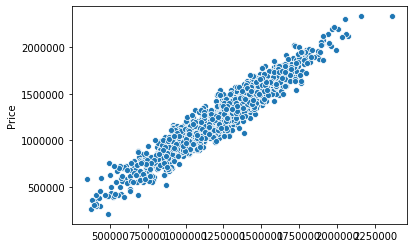

In [32]:
sns.scatterplot(prediction,Y_test)

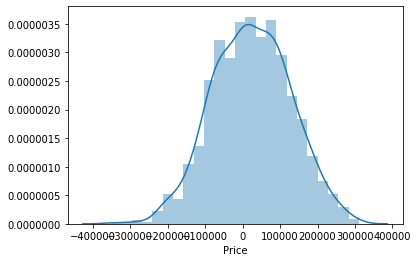

In [33]:
sns.distplot((Y_test-prediction))